In [21]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ipykernel
import feature_engine

# Exploratory Data Analysis (EDA)

### Display the first few rows of the dataset

In [22]:
df = pd.read_csv("C:\\StudentPerformanceFactors\\StudentPerformanceFactors.csv")
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

### Check the shape of the dataset

In [23]:
print(df.shape)

(6607, 20)


### Summary of the dataset

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Check for missing values

In [25]:
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


### Descriptive statistics

In [26]:
print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [27]:
print("\nUnique values in each column:")
print(df.nunique())


Unique values in each column:
Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64


In [28]:
print("\nValue counts for the 'Gender' column:")
print(df['Gender'].value_counts())


Value counts for the 'Gender' column:
Gender
Male      3814
Female    2793
Name: count, dtype: int64


In [29]:
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


# Split the data into Training, Validation, and Test sets


In [30]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.dummy import DummyClassifier

In [31]:
X = df.drop('Attendance', axis=1)
y = df['Attendance']
print(X)
print(y)

      Hours_Studied Parental_Involvement Access_to_Resources  \
0                23                  Low                High   
1                19                  Low              Medium   
2                24               Medium              Medium   
3                29                  Low              Medium   
4                19               Medium              Medium   
...             ...                  ...                 ...   
6602             25                 High              Medium   
6603             23                 High              Medium   
6604             20               Medium                 Low   
6605             10                 High                High   
6606             15               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                            No            7               73   
1                            No            8               59   
2                           Yes     

In [32]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("\nValue Counts for Target Variable (Random Split):")
print("Training set (Attendance):")
print(y_train.value_counts(normalize=True)) 
print("\nValidation set (Attendance):")
print(y_val.value_counts(normalize=True))    
print("\nTest set (Attendance):")
print(y_test.value_counts(normalize=True))


Value Counts for Target Variable (Random Split):
Training set (Attendance):
Attendance
64     0.030020
80     0.029768
77     0.029768
67     0.028759
89     0.028002
82     0.027750
98     0.027750
81     0.027245
69     0.026741
94     0.026741
68     0.026741
88     0.026741
76     0.026741
93     0.025479
84     0.025227
90     0.024975
65     0.024975
95     0.024723
91     0.024470
72     0.024470
70     0.023966
99     0.023966
74     0.023966
63     0.023966
71     0.023966
61     0.023713
73     0.023461
78     0.023209
86     0.023209
97     0.023209
75     0.023209
92     0.022957
62     0.022957
96     0.022704
83     0.022452
66     0.021443
85     0.021443
87     0.021191
79     0.021191
60     0.013875
100    0.012866
Name: proportion, dtype: float64

Validation set (Attendance):
Attendance
96     0.035579
91     0.031794
72     0.031037
79     0.031037
87     0.030280
68     0.030280
98     0.029523
61     0.028766
76     0.028766
83     0.028009
78     0.028009
62    

In [33]:
X_train_strat, X_temp_strat, y_train_strat, y_temp_strat = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val_strat, X_test_strat, y_val_strat, y_test_strat = train_test_split(X_temp_strat, y_temp_strat, test_size=0.5, random_state=42, stratify=y_temp_strat)

print("\nValue Counts for Target Variable (Stratified Split):")
print("Training set (Attendance):")
print(y_train_strat.value_counts(normalize=True))
print("\nValidation set (Attendance):")
print(y_val_strat.value_counts(normalize=True))  
print("\nTest set (Attendance):")
print(y_test_strat.value_counts(normalize=True)) 



Value Counts for Target Variable (Stratified Split):
Training set (Attendance):
Attendance
67     0.028759
98     0.028254
76     0.028002
77     0.027750
64     0.027497
94     0.027245
91     0.026488
84     0.026488
79     0.026488
82     0.026236
68     0.025732
69     0.025732
73     0.025479
81     0.025479
96     0.025479
80     0.025479
93     0.025227
72     0.025227
78     0.024975
74     0.024975
95     0.024723
61     0.024723
70     0.024470
71     0.024470
97     0.024470
89     0.024470
65     0.023966
90     0.023713
83     0.023713
63     0.023461
88     0.023461
99     0.023209
92     0.023209
87     0.022957
62     0.022957
86     0.022957
75     0.022452
85     0.022200
66     0.021948
60     0.013118
100    0.012361
Name: proportion, dtype: float64

Validation set (Attendance):
Attendance
67     0.028766
98     0.028009
76     0.028009
77     0.028009
94     0.027252
64     0.027252
79     0.026495
91     0.026495
84     0.026495
68     0.025738
82     0.025738
80

# Wrong

In [34]:
# Wrong

X_clean = X.copy()
y_clean = y.copy()

dummy_clf = DummyClassifier(strategy='most_frequent')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(dummy_clf, X_clean, y_clean, cv=skf)

print("\nCross-Validation Scores:")
print(cross_val_scores)


Cross-Validation Scores:
[0.02874433 0.02874433 0.02876609 0.02876609 0.02876609]


# Right

In [35]:
dummy_clf = DummyClassifier(strategy='most_frequent')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

class DataCleaner:
    def fit(self, X, y=None):
        pass
    
    def transform(self, X):
        return X

cross_val_scores = []

for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    cleaner = DataCleaner()

    cleaner.fit(X_train)

    X_train_cleaned = cleaner.transform(X_train)
    X_val_cleaned = cleaner.transform(X_val)

    dummy_clf.fit(X_train_cleaned, y_train)

    score = dummy_clf.score(X_val_cleaned, y_val)
    cross_val_scores.append(score)

print("\nCross-Validation Scores:")
print(cross_val_scores)


Cross-Validation Scores:
[0.028744326777609682, 0.028744326777609682, 0.028766086298258896, 0.028766086298258896, 0.028766086298258896]


In [36]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [37]:
print(f"Training set (X_train, y_train) shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set (X_val, y_val) shape: {X_val.shape}, {y_val.shape}")
print(f"Test set (X_test, y_test) shape: {X_test.shape}, {y_test.shape}")

Training set (X_train, y_train) shape: (3964, 19), (3964,)
Validation set (X_val, y_val) shape: (1321, 19), (1321,)
Test set (X_test, y_test) shape: (1322, 19), (1322,)


In [38]:
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()


### Univariate Analysis

### Distribution of numerical columns

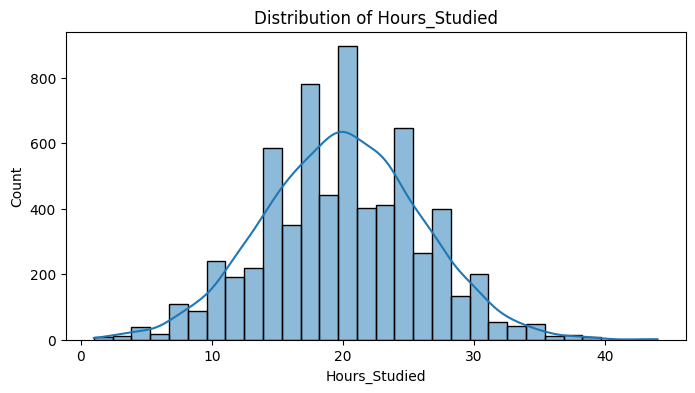

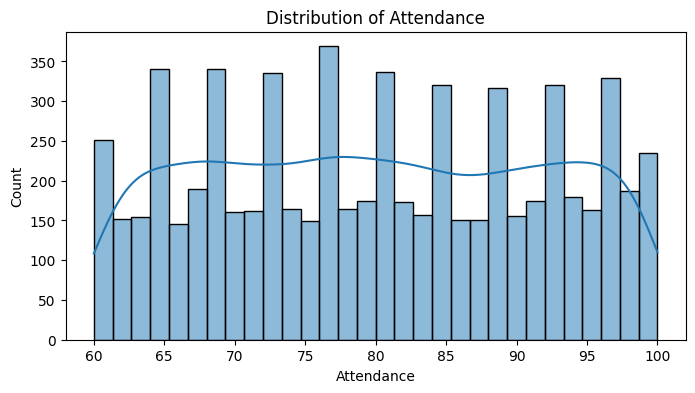

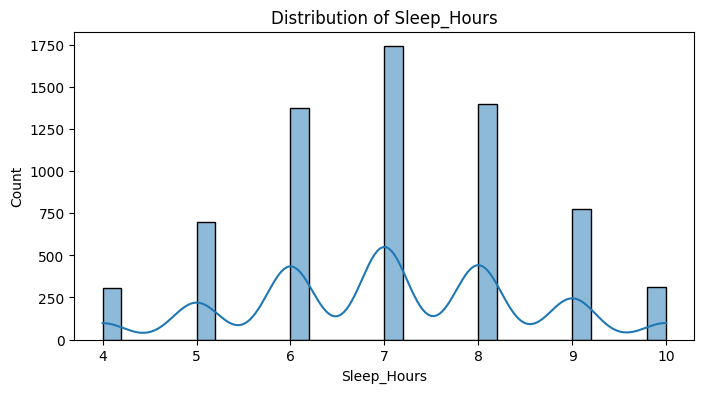

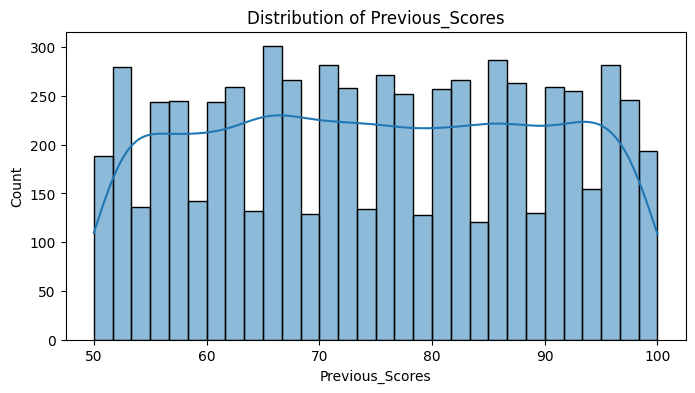

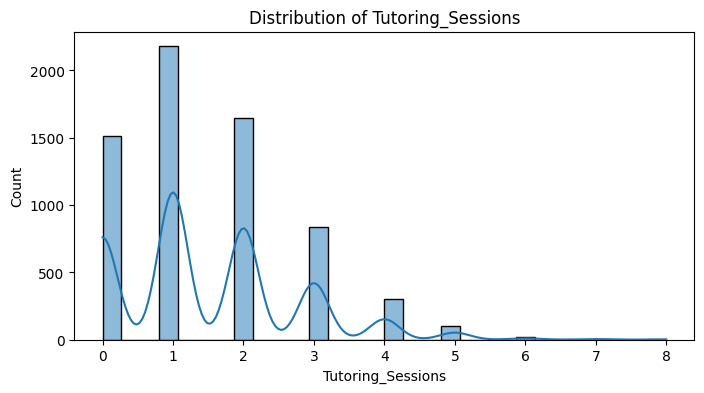

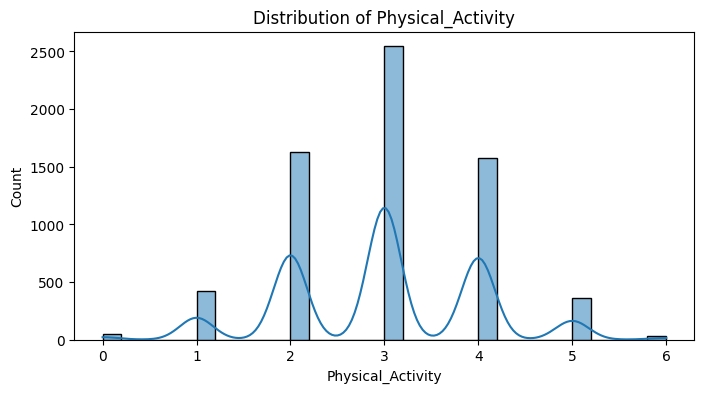

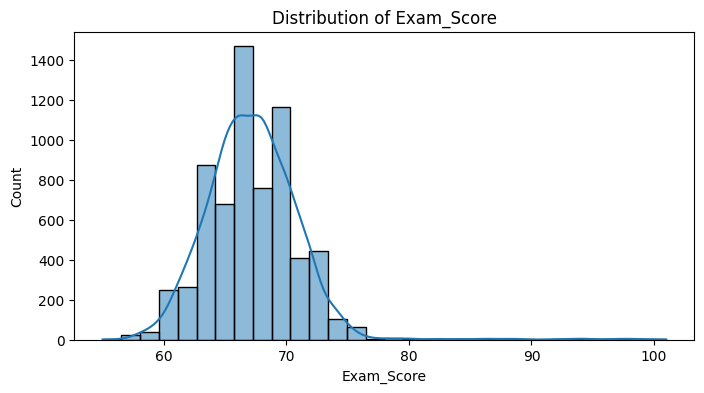

In [39]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


## Categorical column analysis

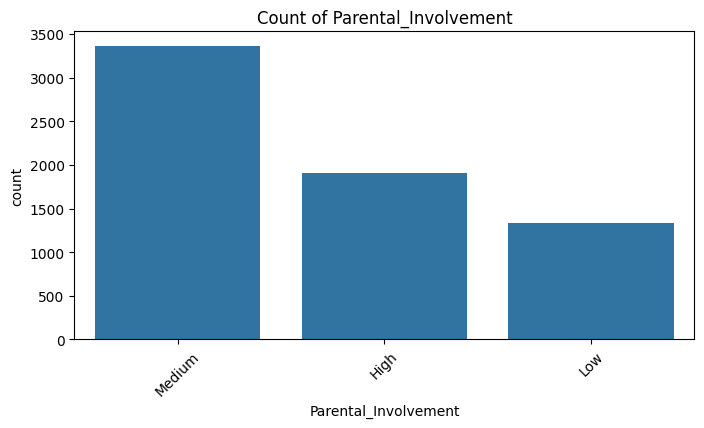

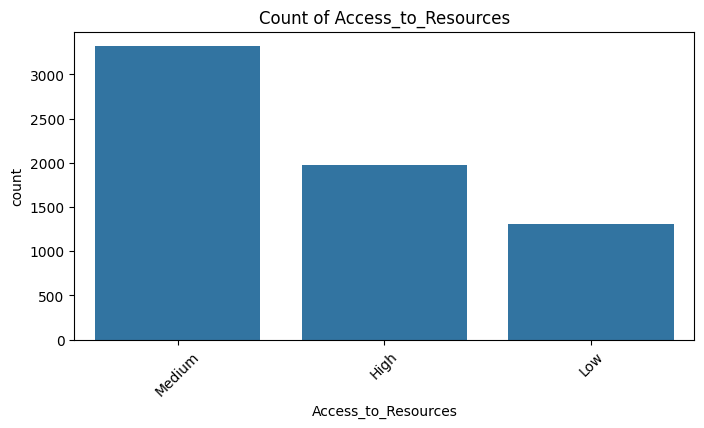

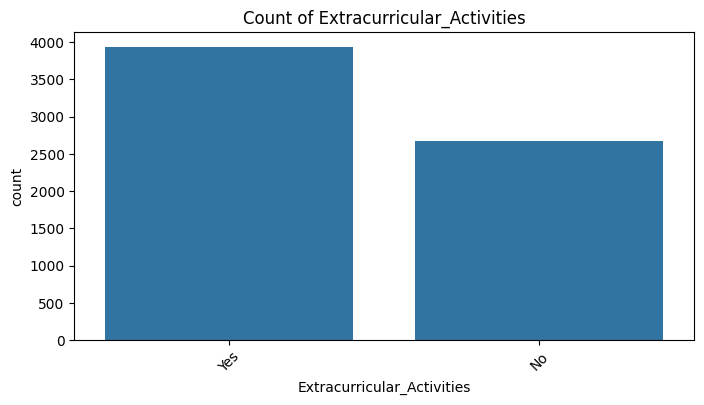

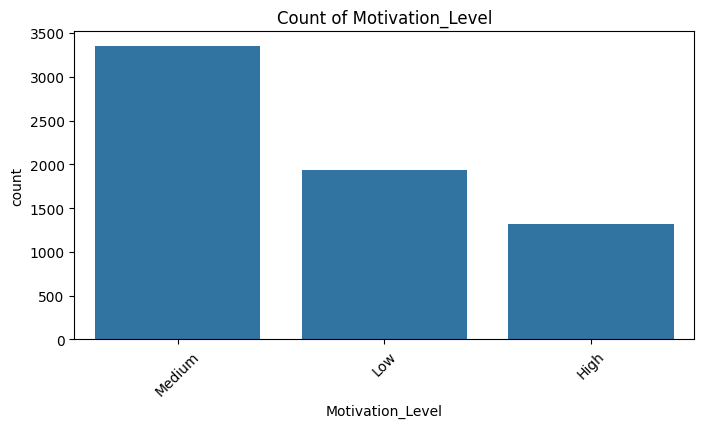

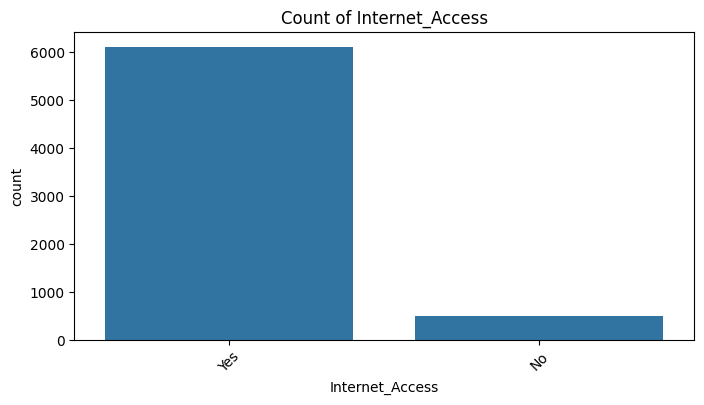

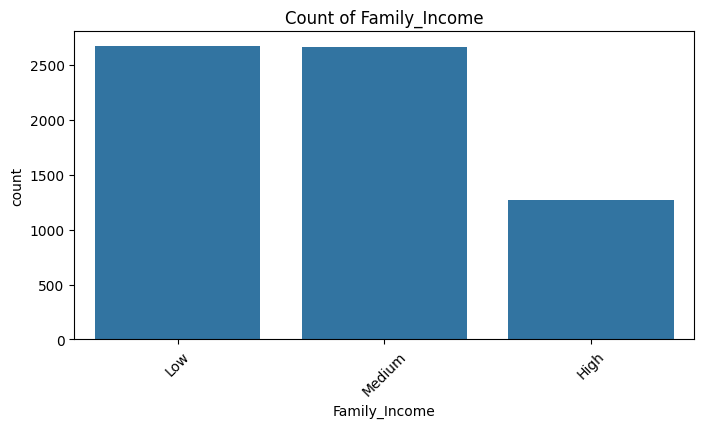

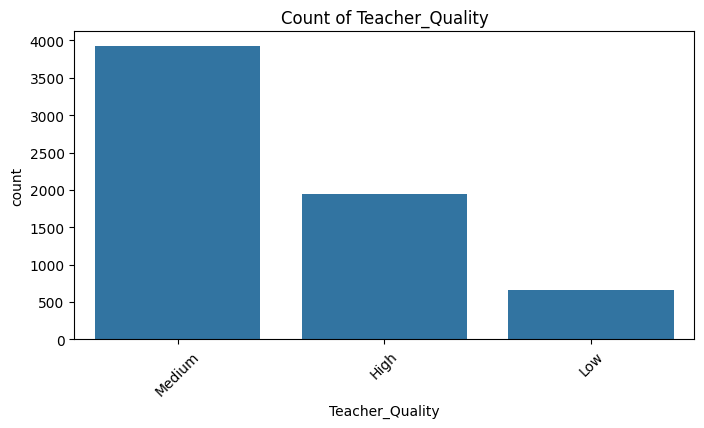

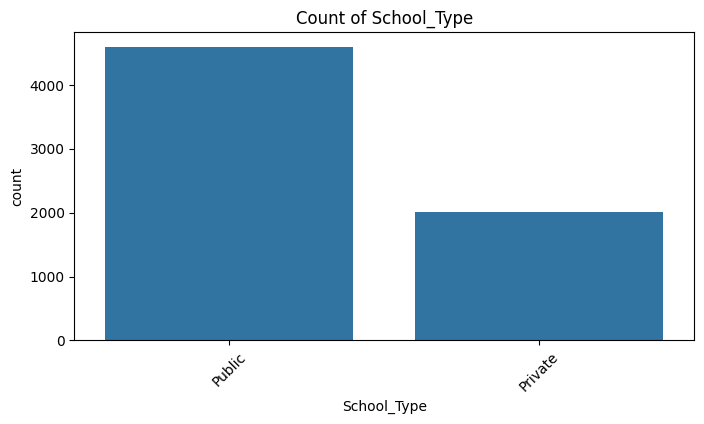

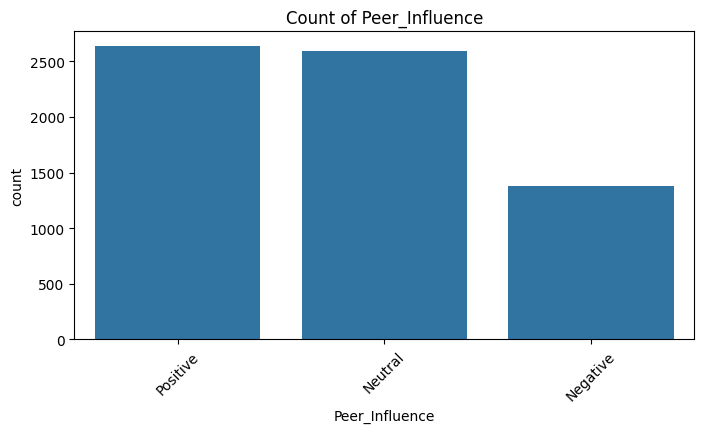

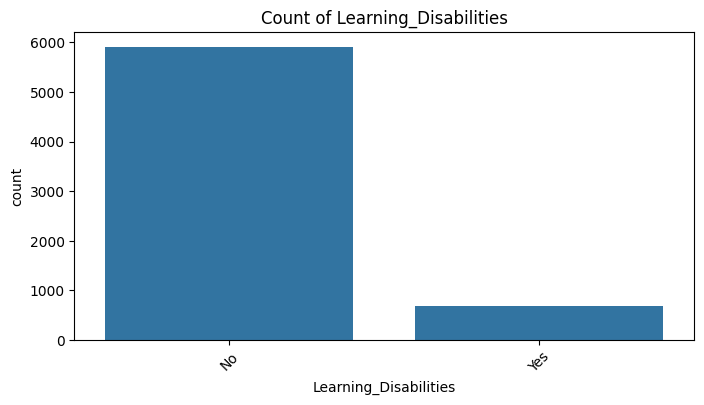

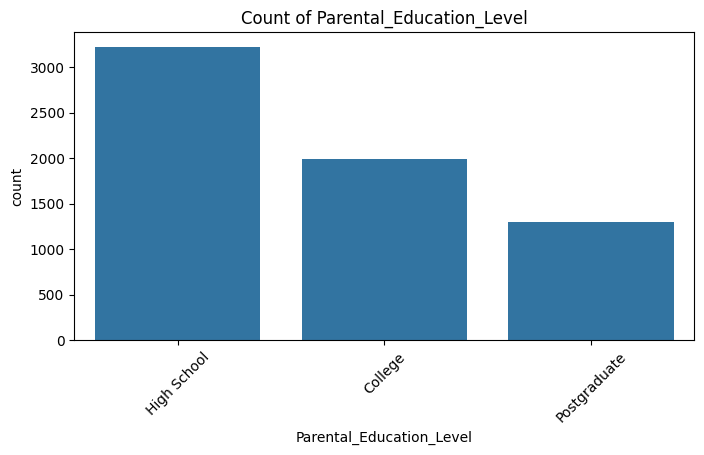

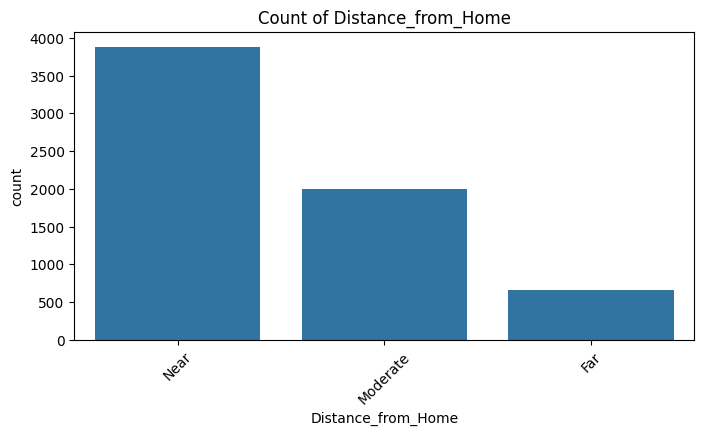

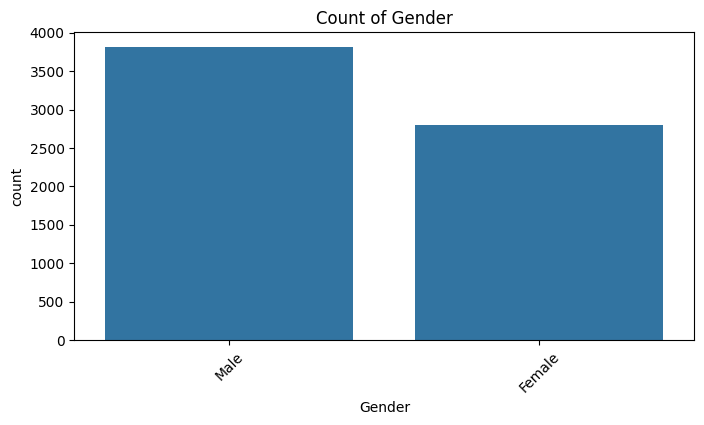

In [40]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()


### Multivariate Analysis
### Correlation heatmap

In [41]:
print(df.dtypes)

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


In [42]:
print(df.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


###  Explore relationships between features and the target variable


Distribution of the Exam_Score Variable:


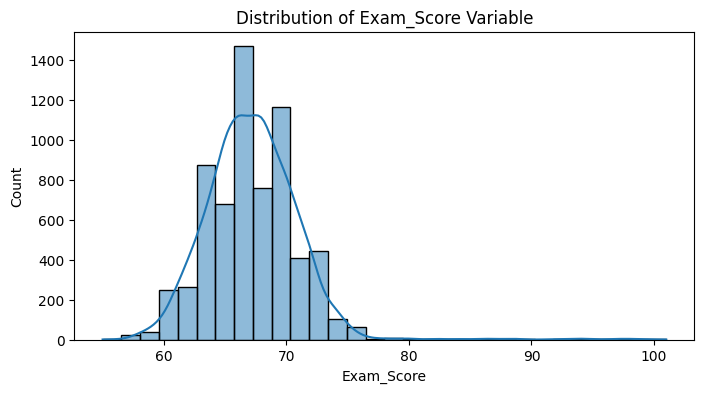

In [43]:

# Check if the Exam_Score variable exists in the dataset
if 'Exam_Score' in df.columns:
    # Distribution of the Exam_Score variable
    print("\nDistribution of the Exam_Score Variable:")
    plt.figure(figsize=(8, 4))
    sns.histplot(df['Exam_Score'], kde=True, bins=30)
    plt.title('Distribution of Exam_Score Variable')
    plt.show()
    

###   Numerical features vs. target


Relationships between numerical features and the Exam_Score variable:


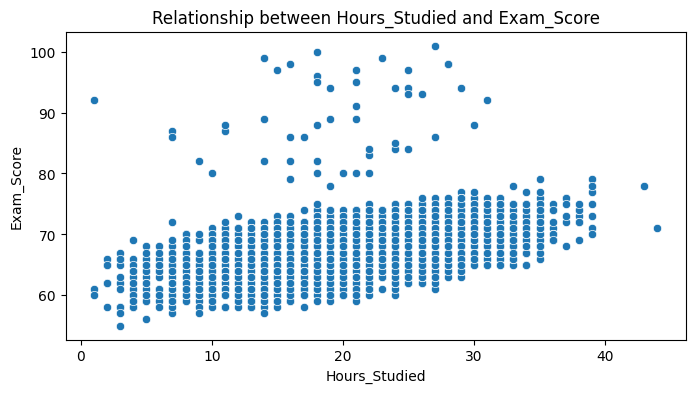

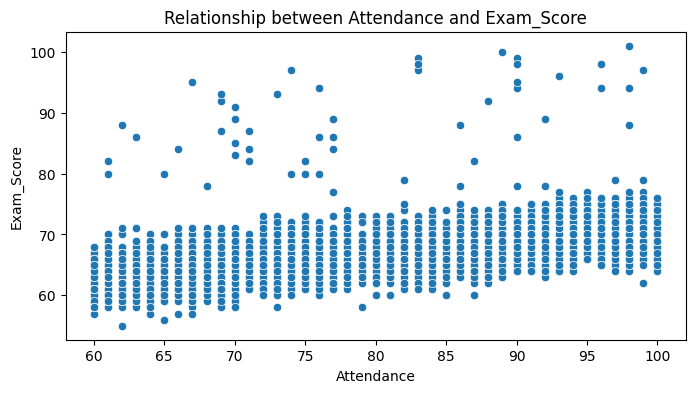

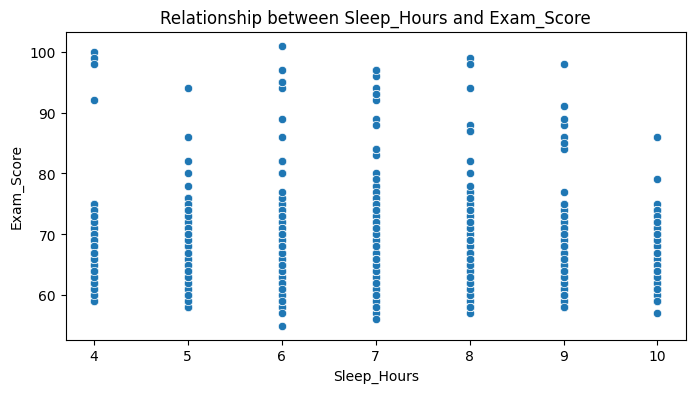

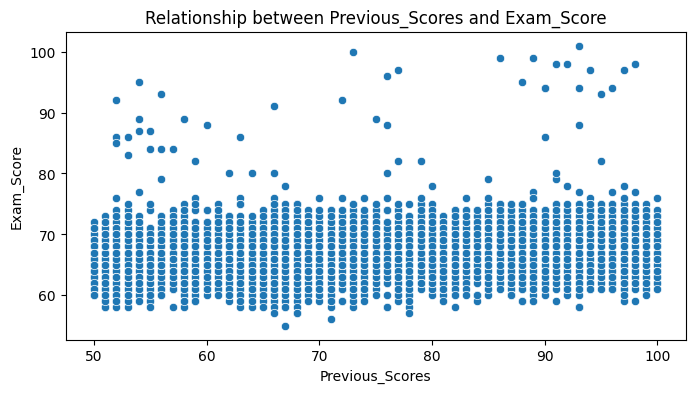

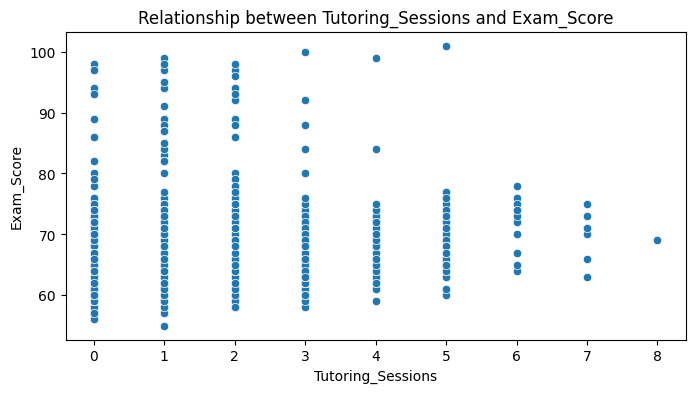

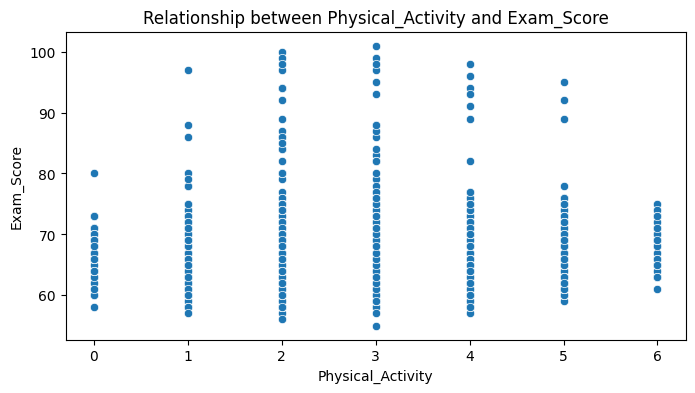

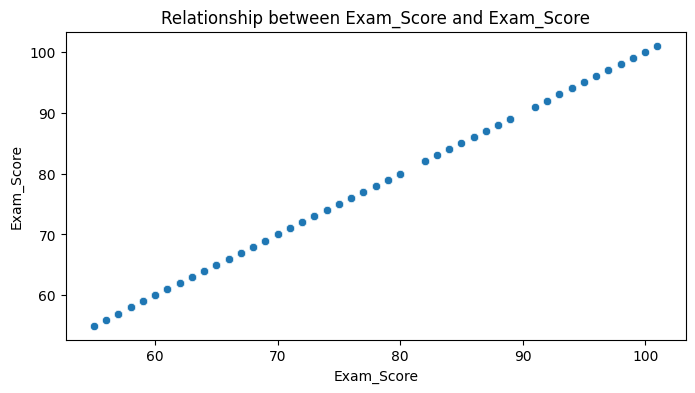

In [44]:
print("\nRelationships between numerical features and the Exam_Score variable:")
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for num_col in num_cols:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=df[num_col], y=df['Exam_Score'])
        plt.title(f'Relationship between {num_col} and Exam_Score')
        plt.show()

### Explore relationships between features and other features

In [45]:
from sklearn.preprocessing import LabelEncoder
# Convert string columns to numeric using Label Encoding where necessary
def convert_columns_with_label_encoder(df):
    label_encoder = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'object':  # Check if the column is of type object (strings)
            df[col] = label_encoder.fit_transform(df[col].astype(str))  # Encode strings to integers
    return df

data = convert_columns_with_label_encoder(df)

In [46]:
# Correlation matrix
correlation_matrix = data.corr()

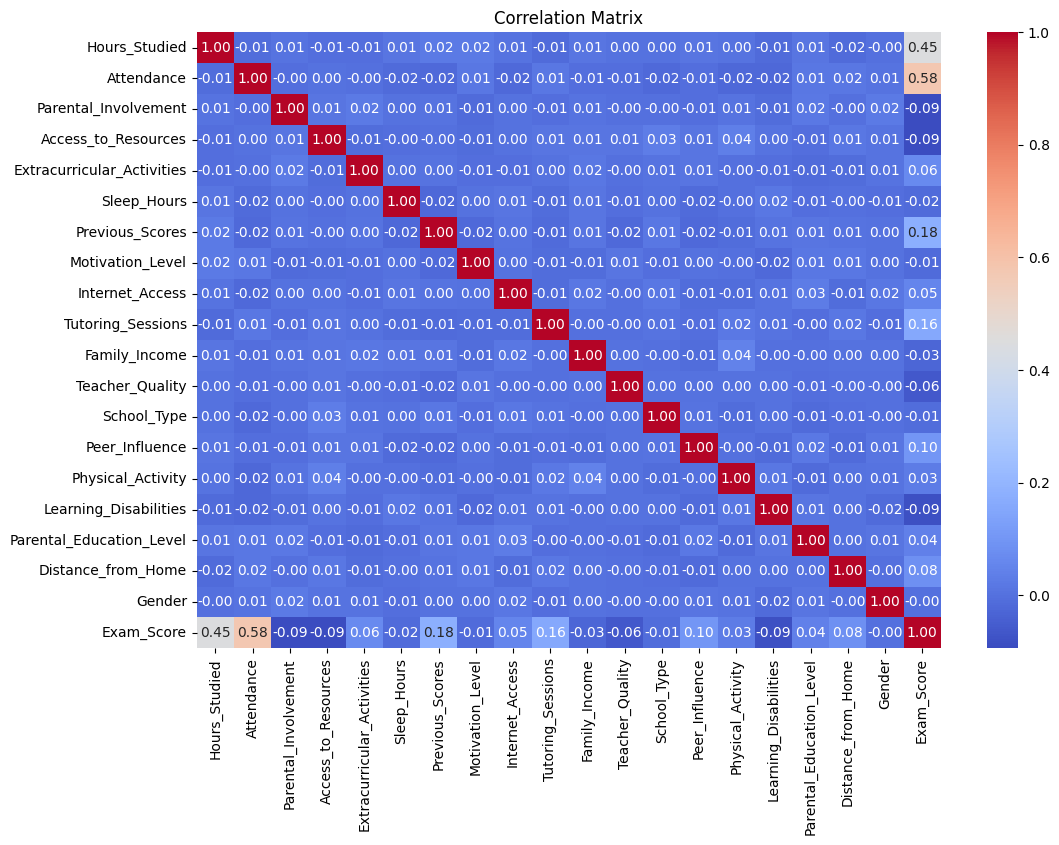

In [47]:
# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


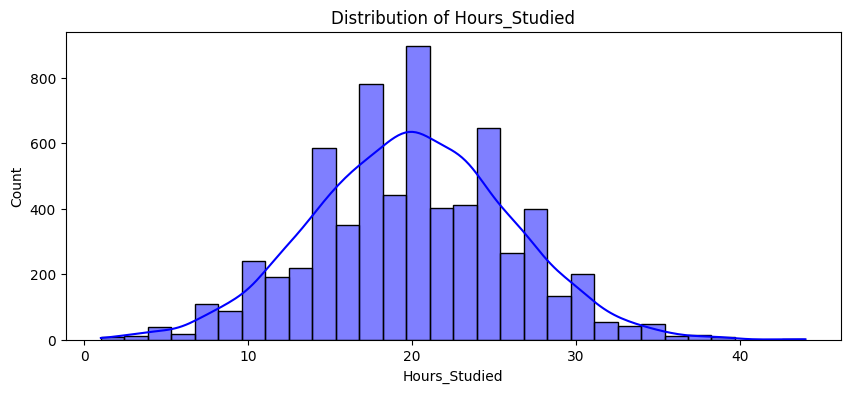

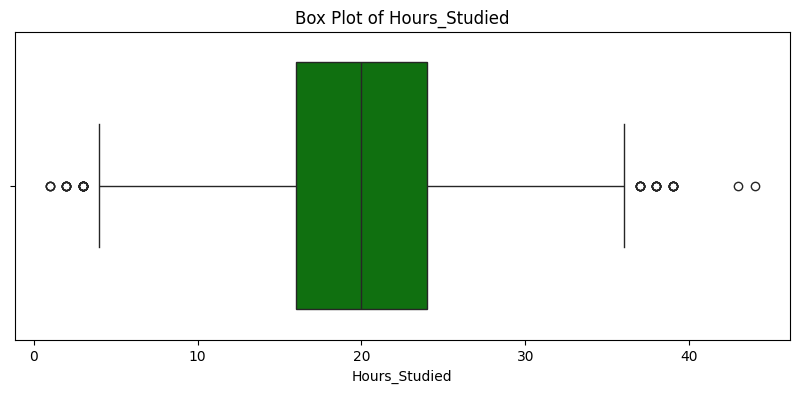

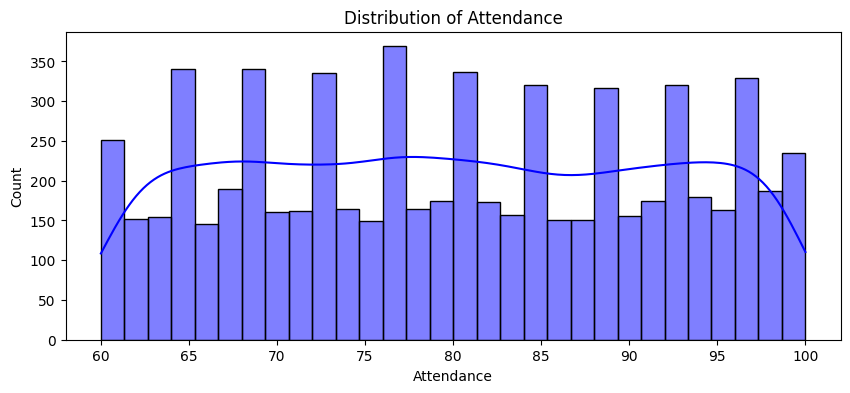

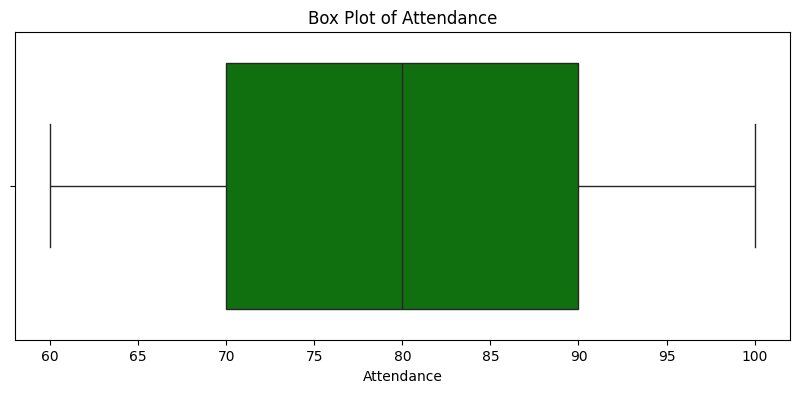

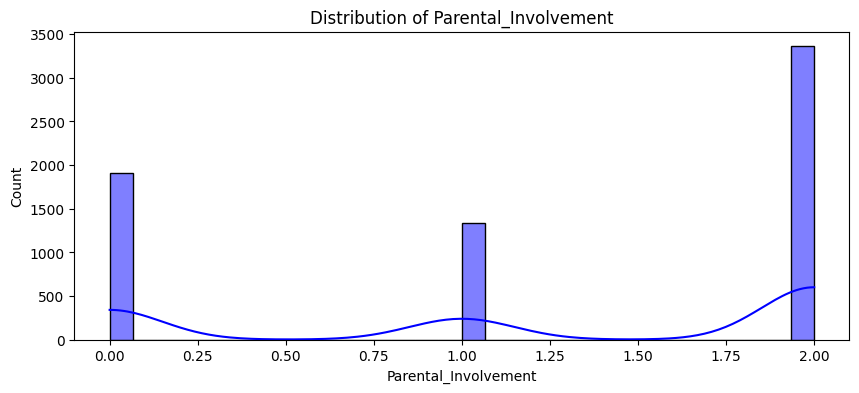

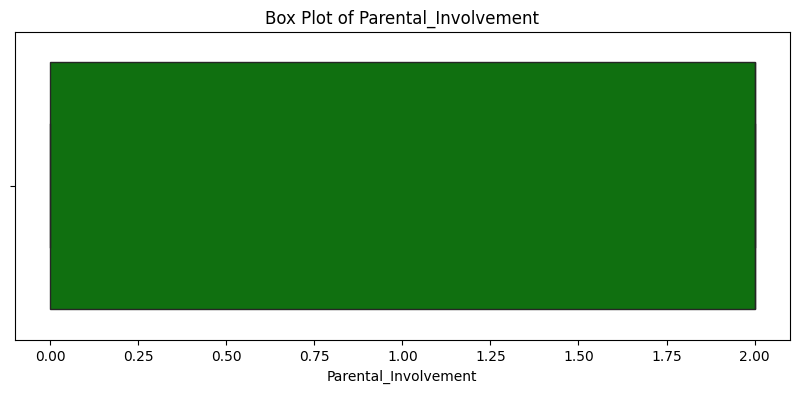

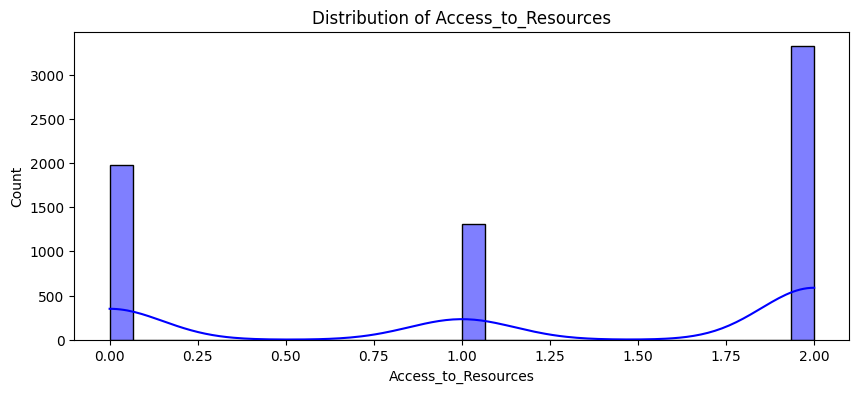

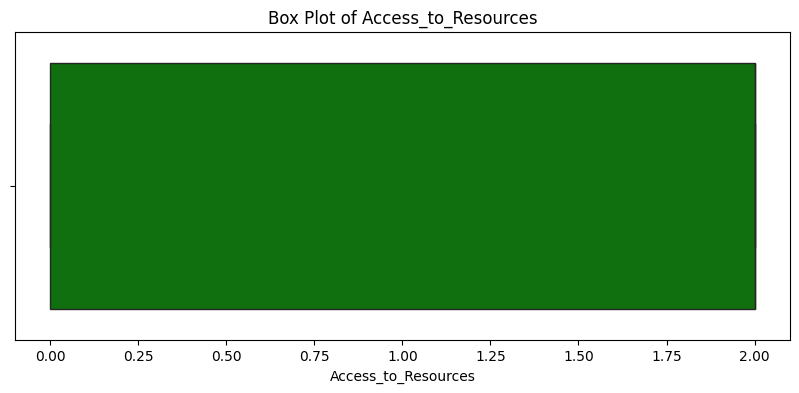

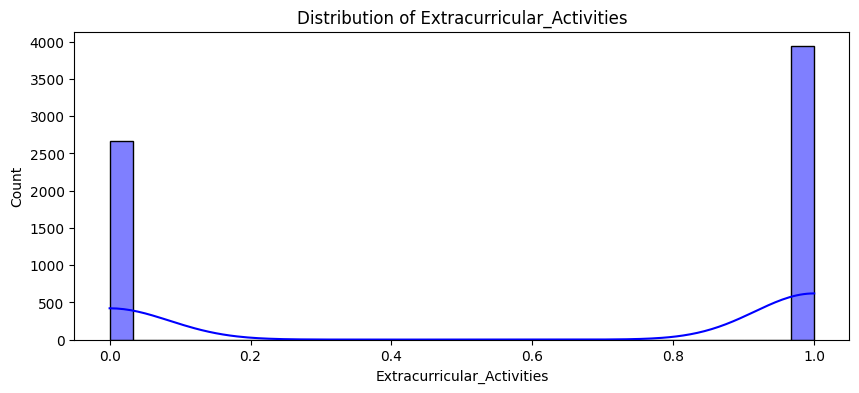

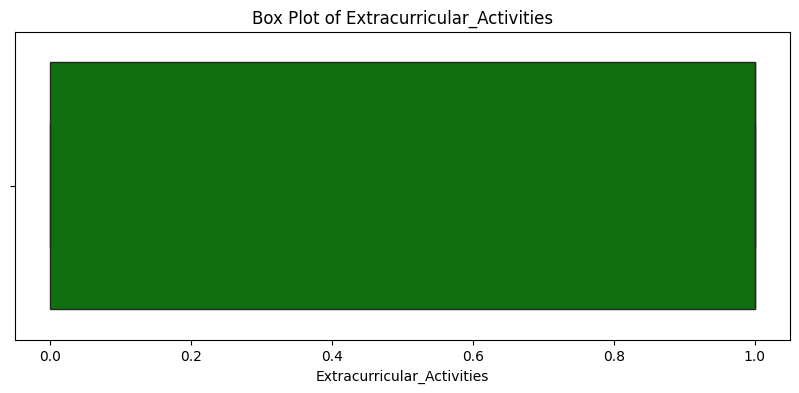

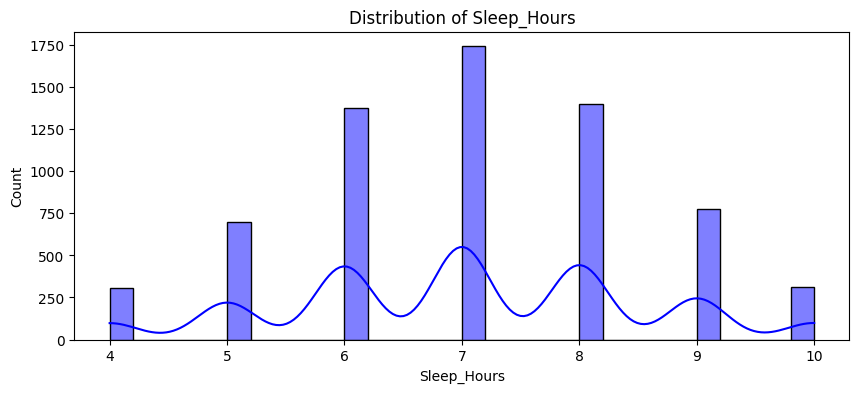

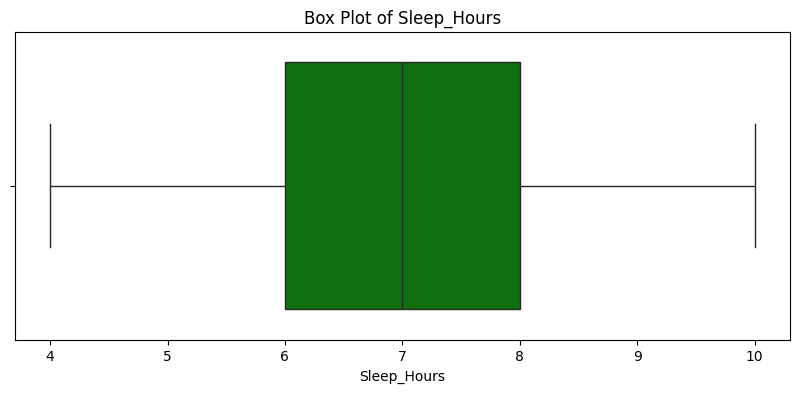

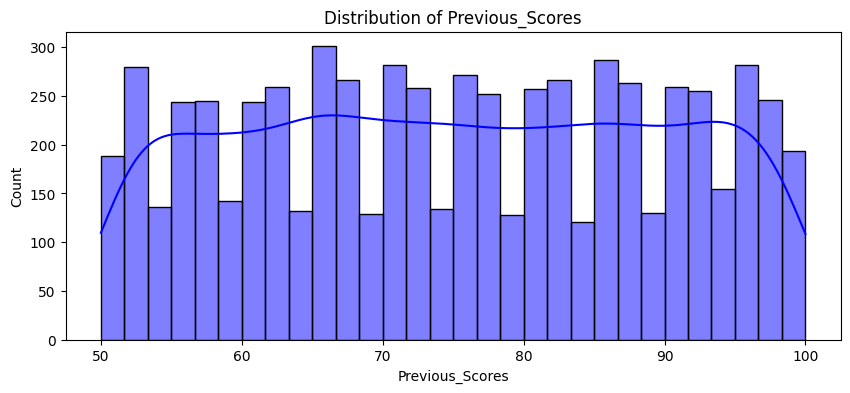

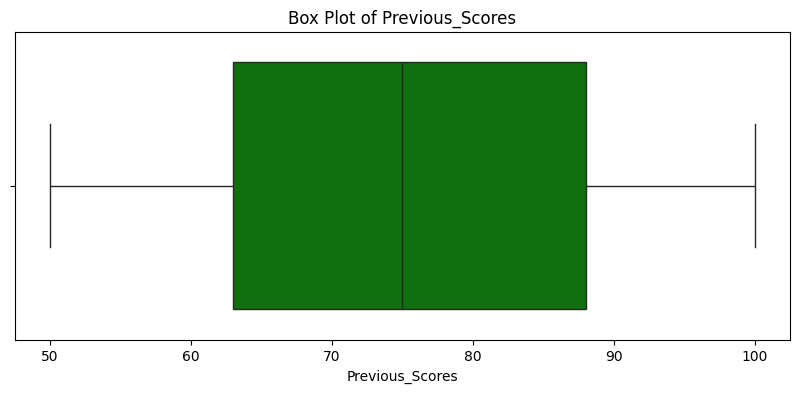

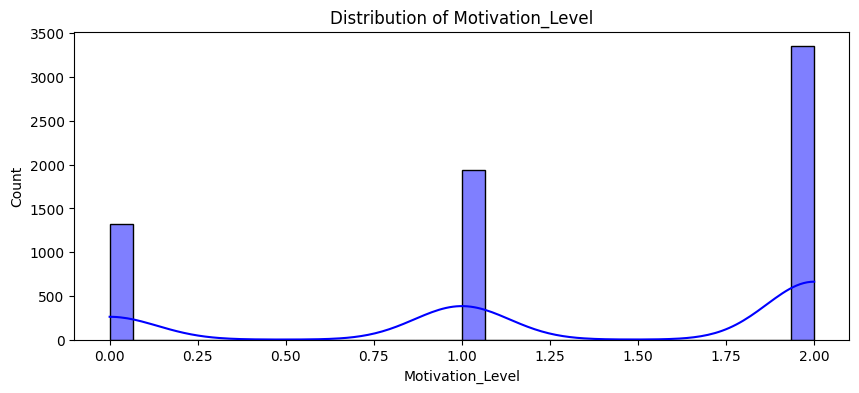

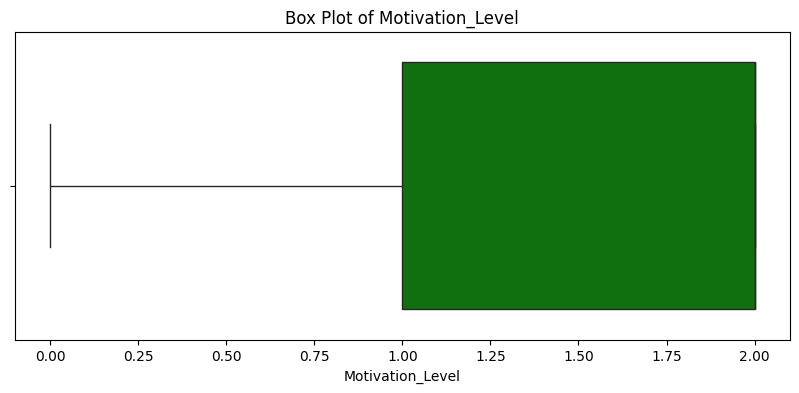

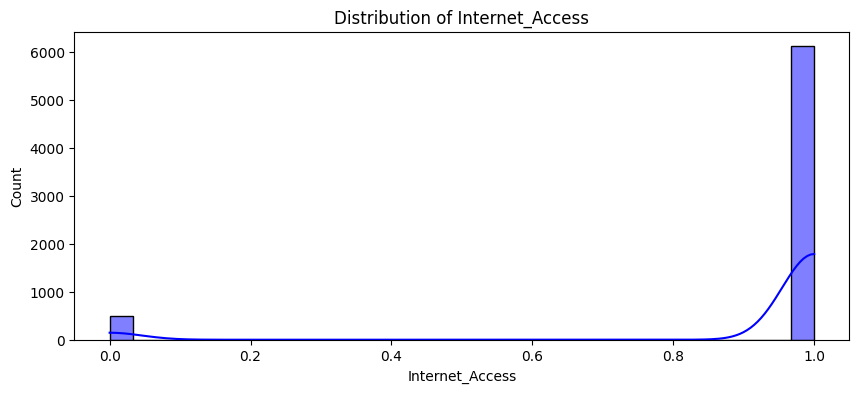

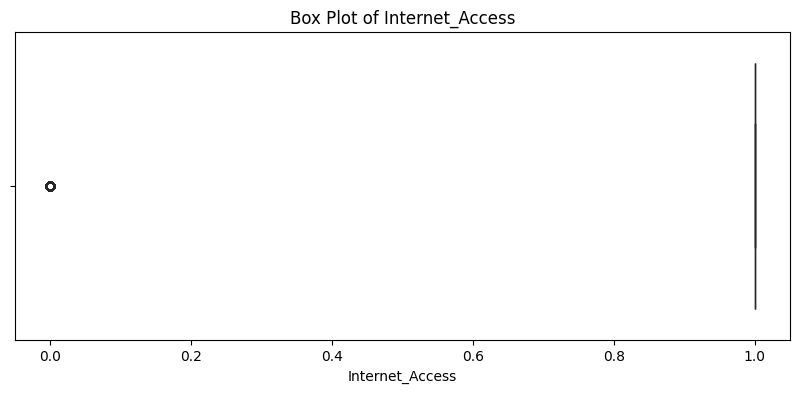

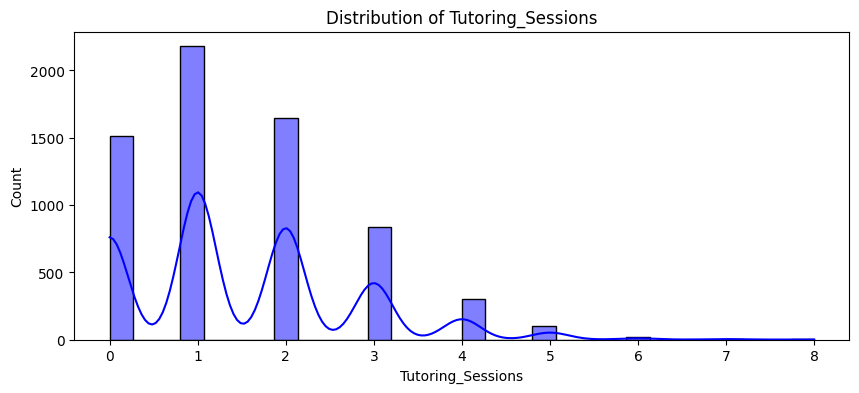

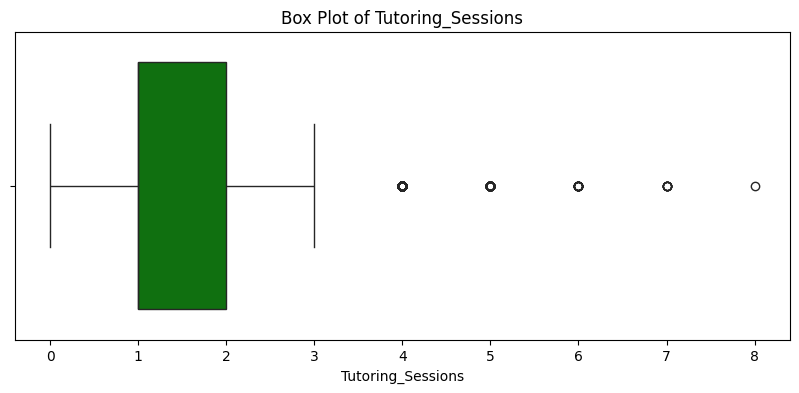

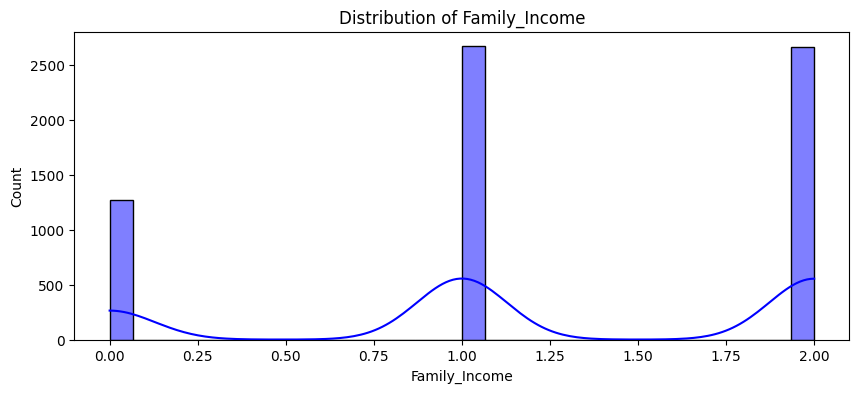

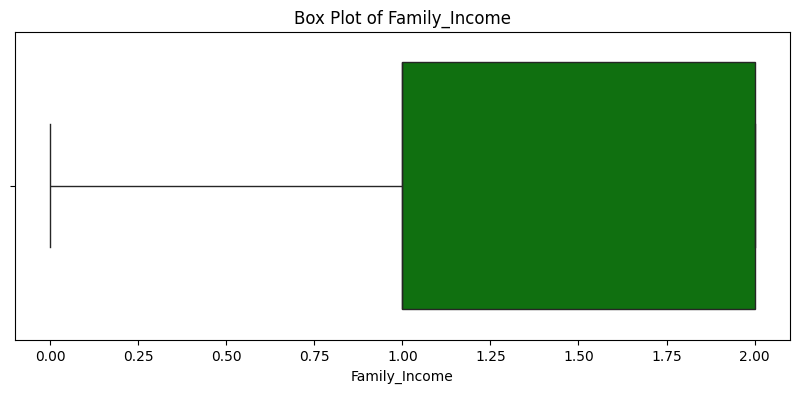

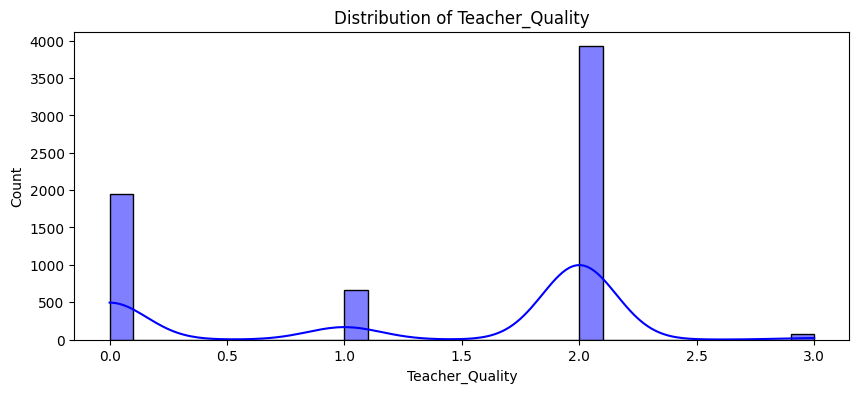

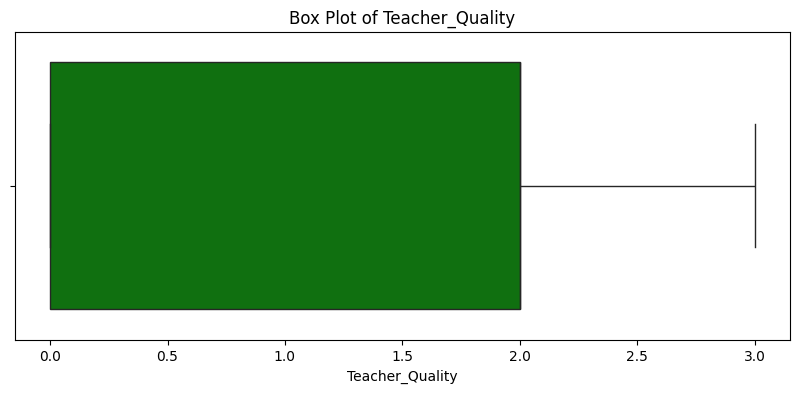

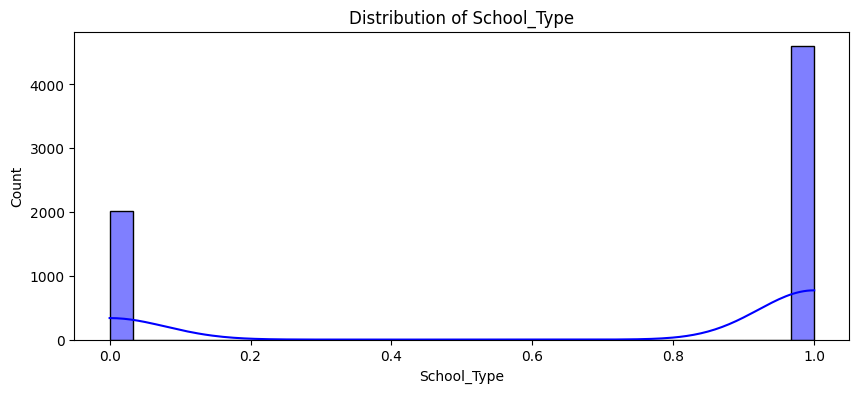

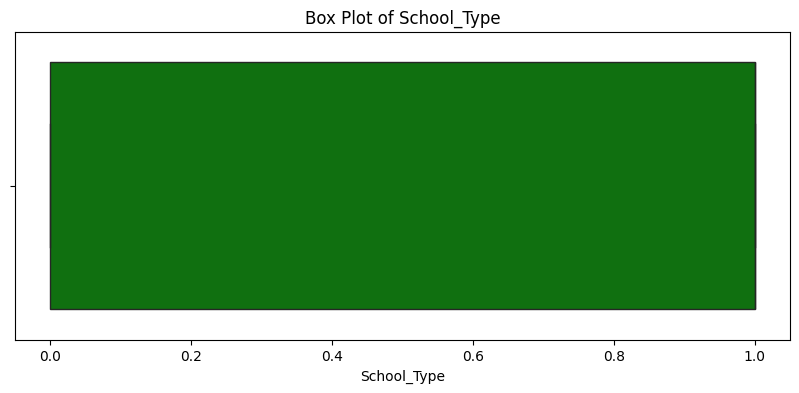

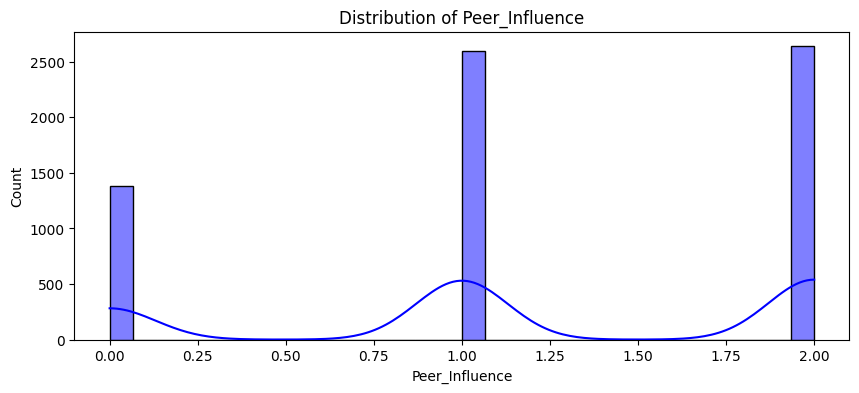

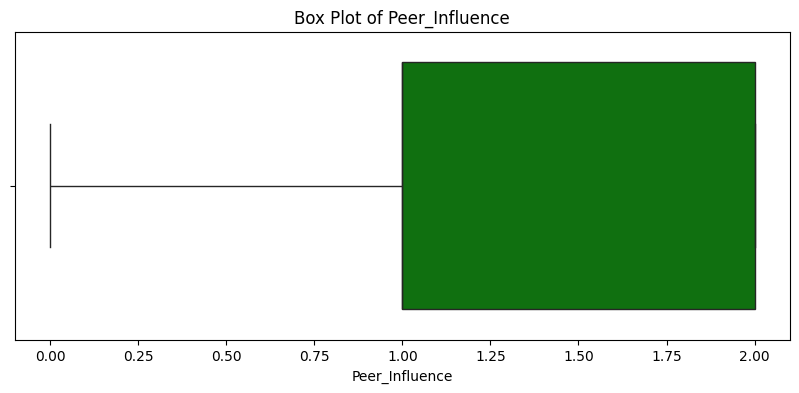

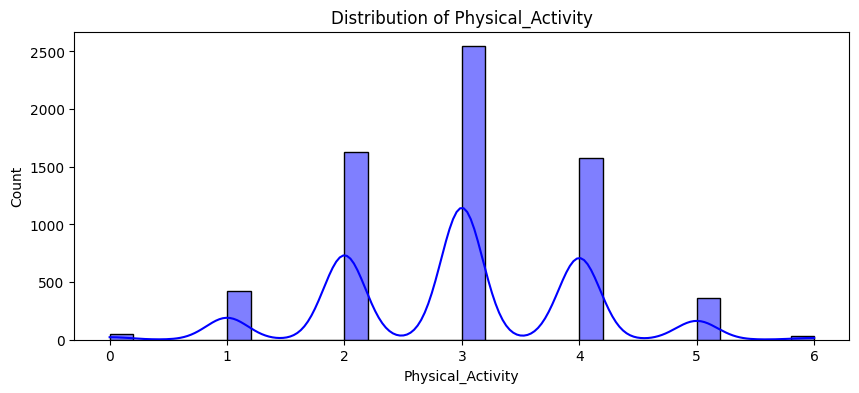

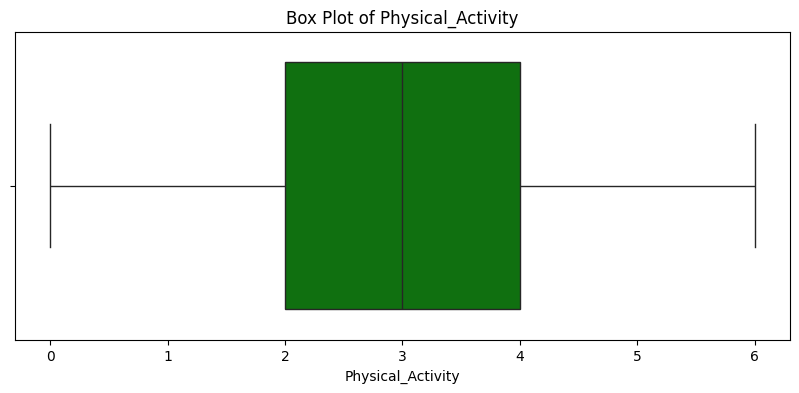

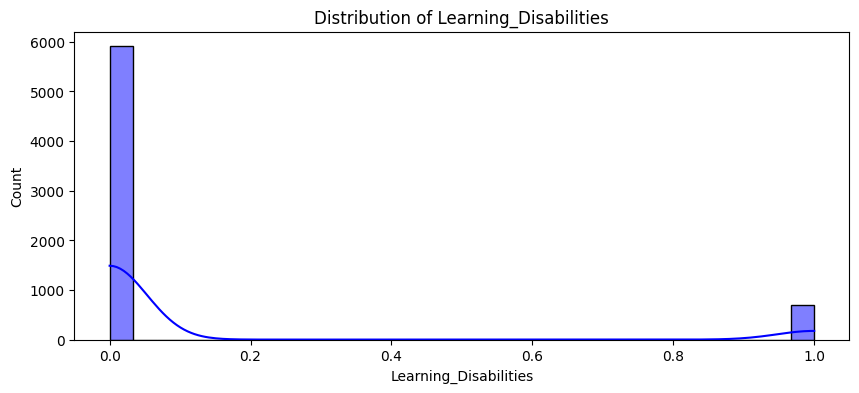

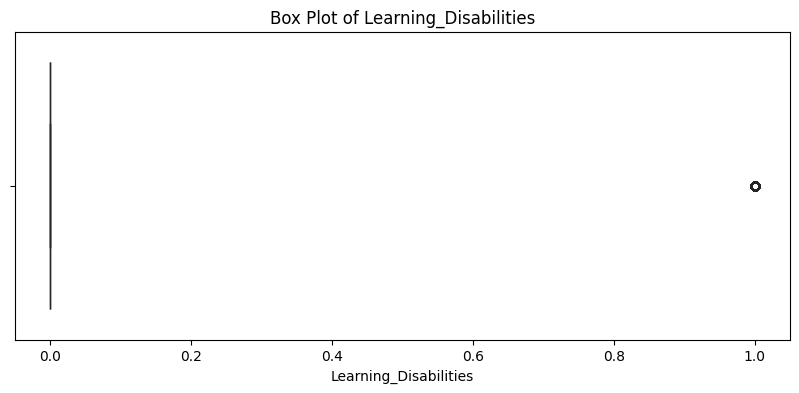

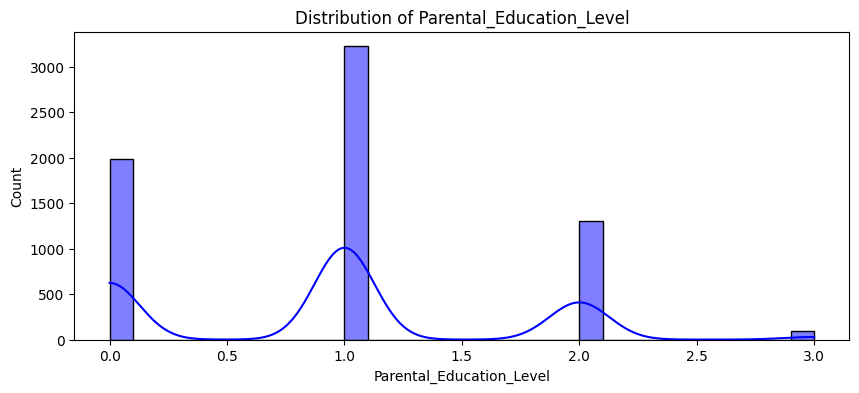

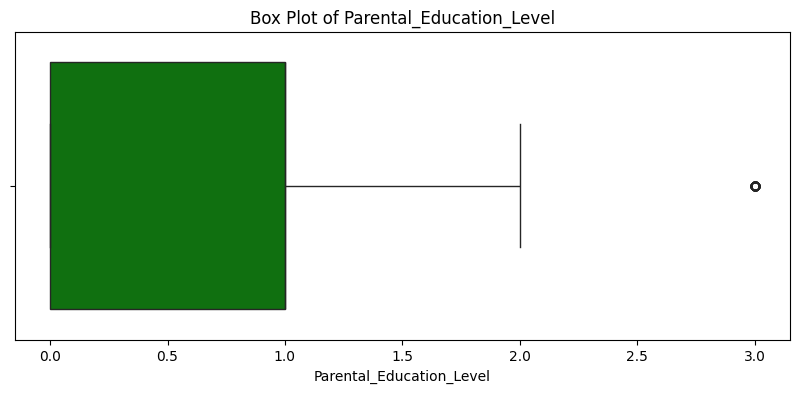

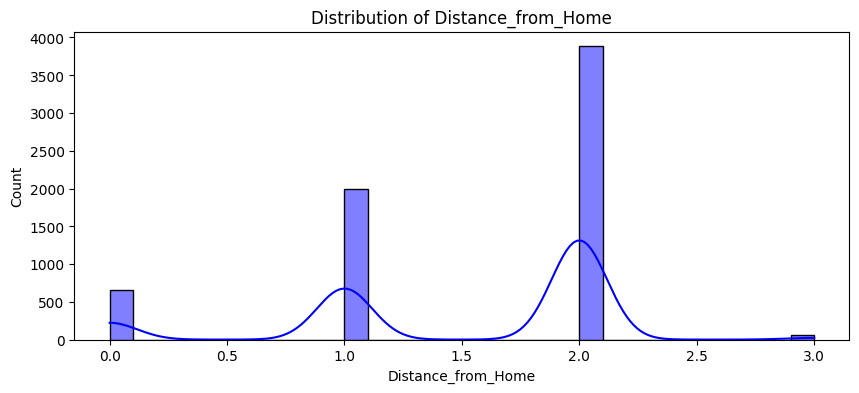

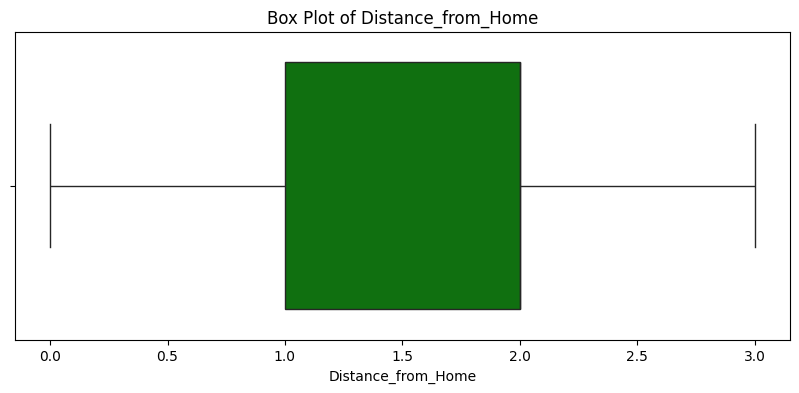

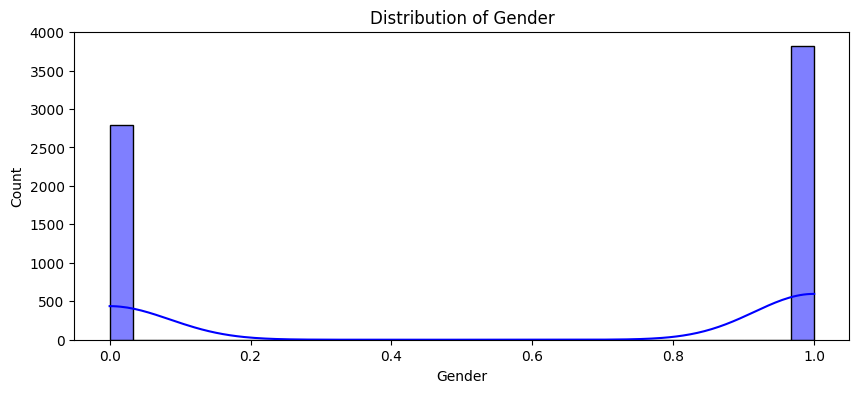

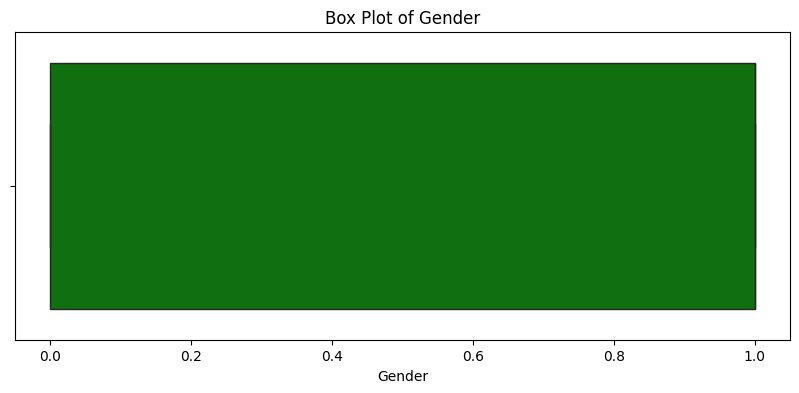

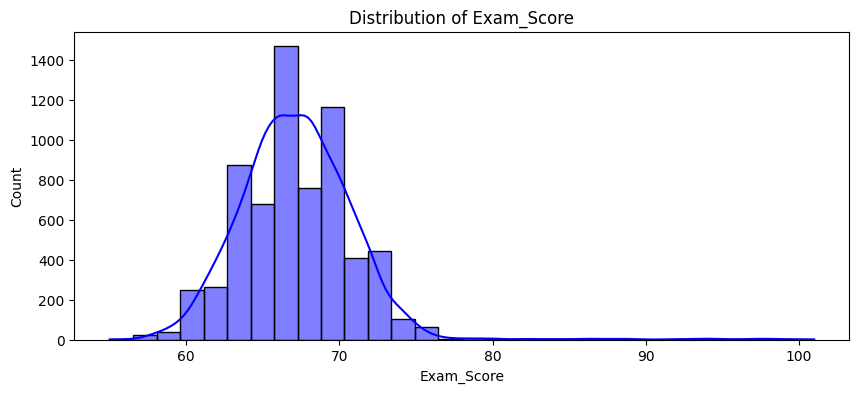

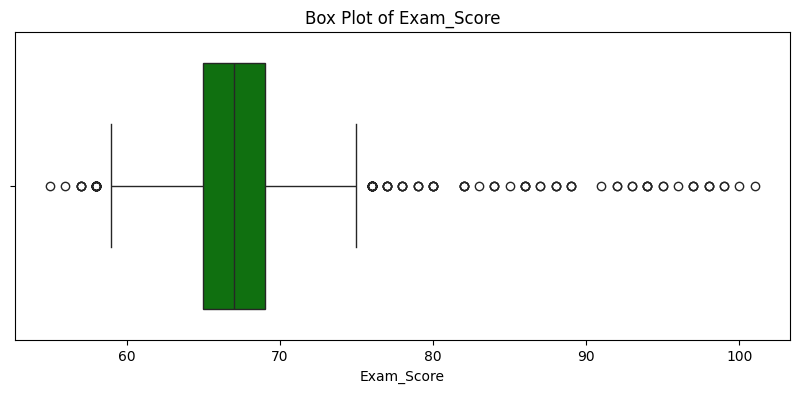

In [49]:
# Feature distribution and box plots
for column in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[column], color='green')
    plt.title(f'Box Plot of {column}')
    plt.show()


### Split variables into numerical and categorical

In [50]:
def split_numerical_categorical(df):
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
    return numerical_cols, categorical_cols

numerical_cols, categorical_cols = split_numerical_categorical(data)

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numerical columns: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']
Categorical columns: []


In [51]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

X_train.select_dtypes(include=['int64', 'float64']).corr()


Numerical Features: ['Hours_Studied', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
Categorical Features: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


Hours_Studied  Sleep_Hours  Previous_Scores  \
Hours_Studied           1.000000     0.011973         0.008622   
Sleep_Hours             0.011973     1.000000        -0.013056   
Previous_Scores         0.008622    -0.013056         1.000000   
Tutoring_Sessions      -0.014353    -0.010923         0.003280   
Physical_Activity      -0.019234    -0.003072        -0.010439   
Exam_Score              0.448606    -0.020951         0.174072   

                   Tutoring_Sessions  Physical_Activity  Exam_Score  
Hours_Studied              -0.014353          -0.019234    0.448606  
Sleep_Hours                -0.010923          -0.003072   -0.020951  
Previous_Scores             0.003280          -0.010439    0.174072  
Tutoring_Sessions           1.000000           0.016609    0.159963  
Physical_Activity           0.016609           1.000000    0.037916  
Exam_Score                  0.159963           0.037916    1.000000

# Numerical Features 

### Focused analysis on numerical features

In [52]:
print("Analyzing Numerical Features:")

Analyzing Numerical Features:


### Statistics of numerical features

In [54]:
numerical_data = data[numerical_cols]
print(numerical_data.describe())

       Hours_Studied   Attendance  Parental_Involvement  Access_to_Resources  \
count    6607.000000  6607.000000           6607.000000          6607.000000   
mean       19.975329    79.977448              1.220070             1.203421   
std         5.990594    11.547475              0.865634             0.871783   
min         1.000000    60.000000              0.000000             0.000000   
25%        16.000000    70.000000              0.000000             0.000000   
50%        20.000000    80.000000              2.000000             2.000000   
75%        24.000000    90.000000              2.000000             2.000000   
max        44.000000   100.000000              2.000000             2.000000   

       Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
count                 6607.000000   6607.00000      6607.000000   
mean                     0.596035      7.02906        75.070531   
std                      0.490728      1.46812        14.399784   
min        

### Visualizing the correlation matrix for numerical features

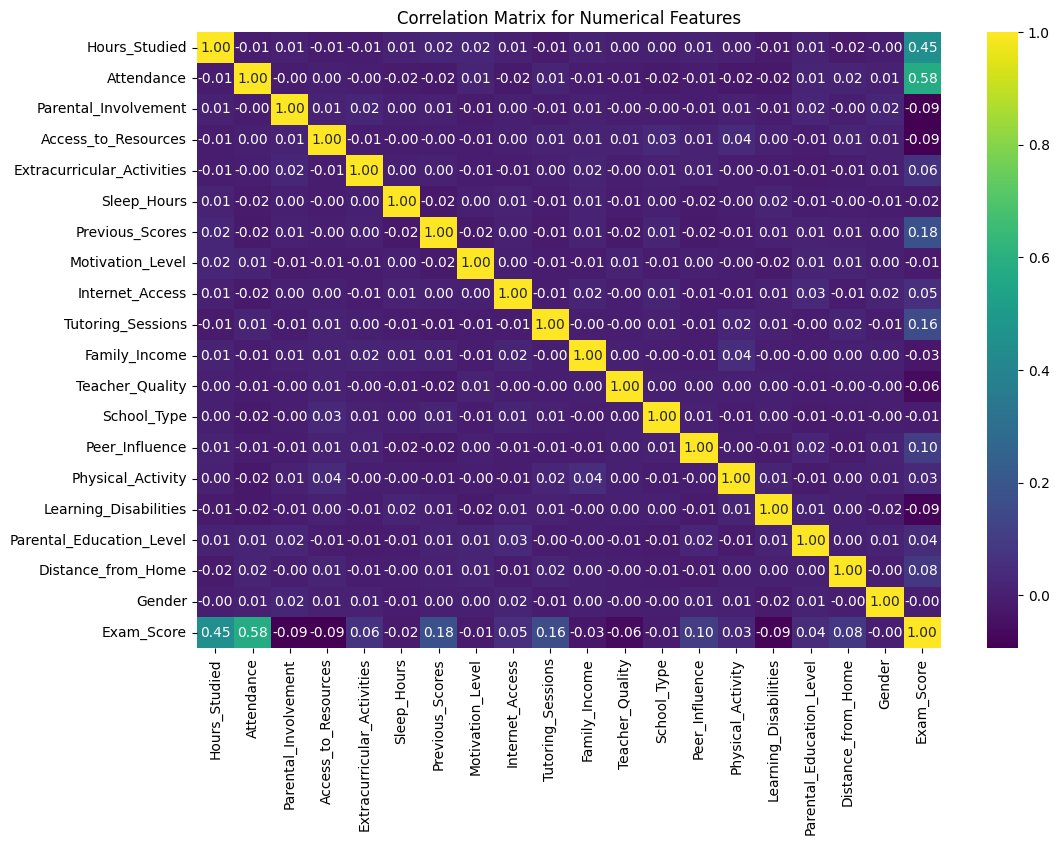

In [55]:
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

## Visualizing each numerical feature

In [58]:
discrete_var = [var for var in numerical_features if X_train[var].nunique() < 20]
print(len(discrete_var))
X_train[discrete_var].head()

3


Sleep_Hours  Tutoring_Sessions  Physical_Activity
3036            9                  4                  4
21              6                  1                  3
398             6                  1                  3
2772            7                  1                  3
3220            9                  0                  3

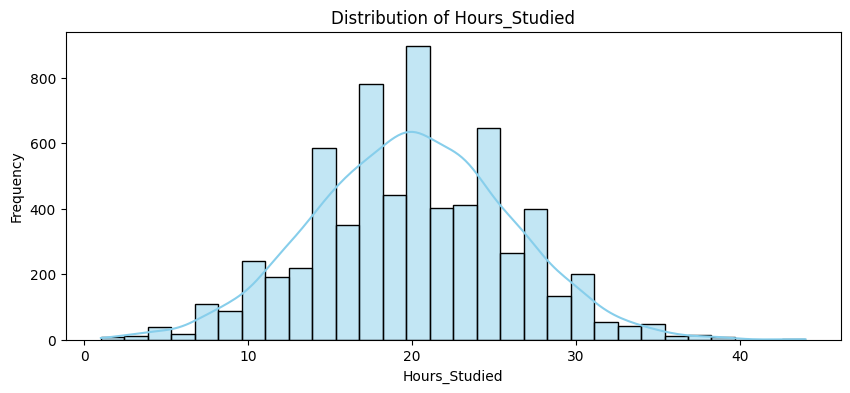

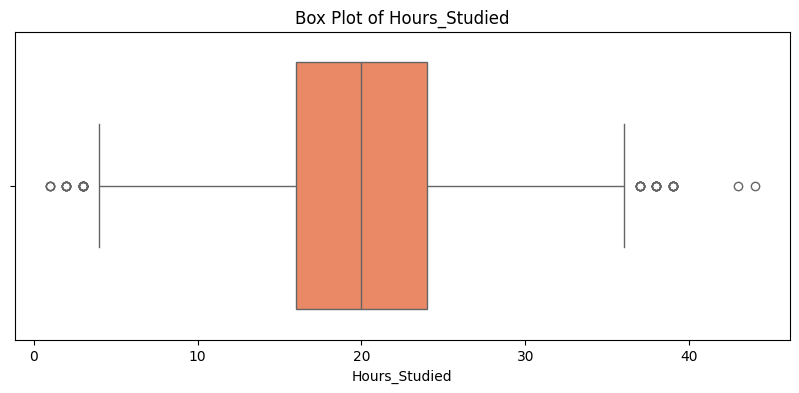

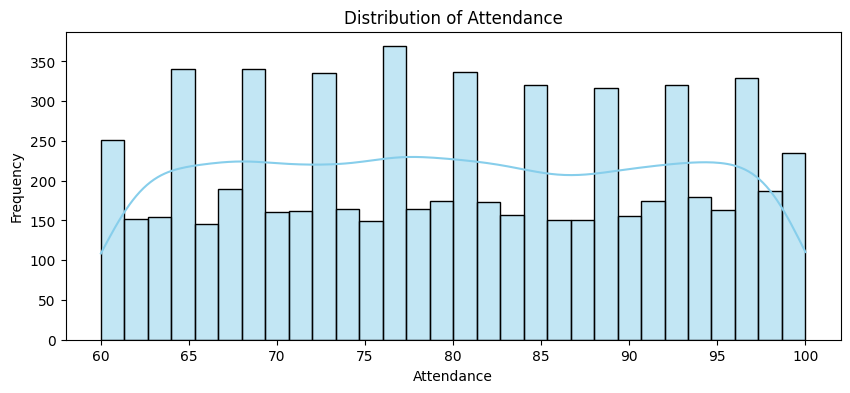

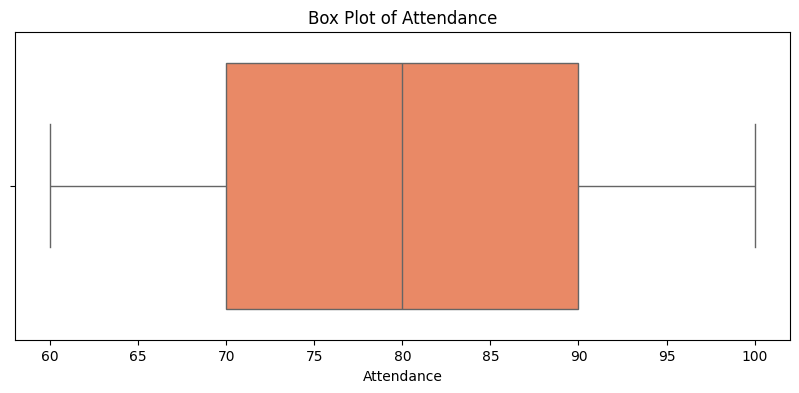

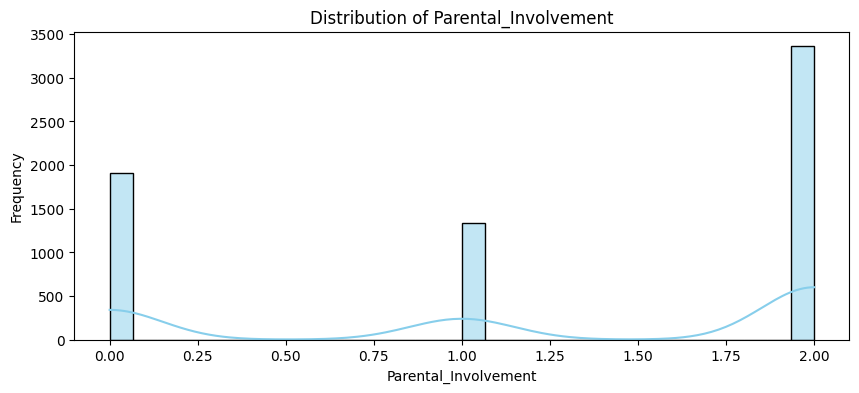

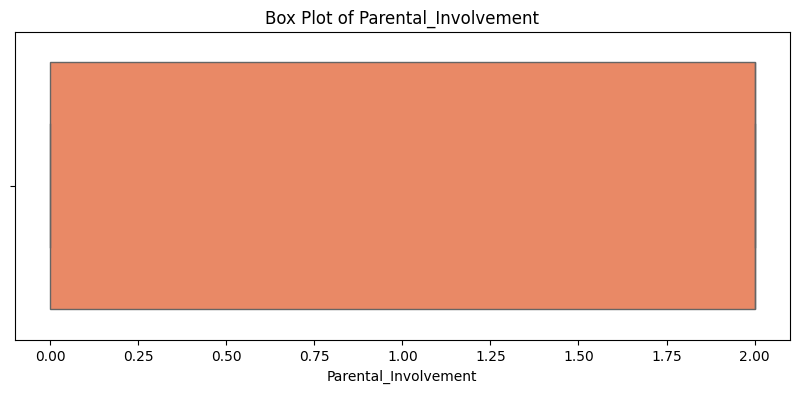

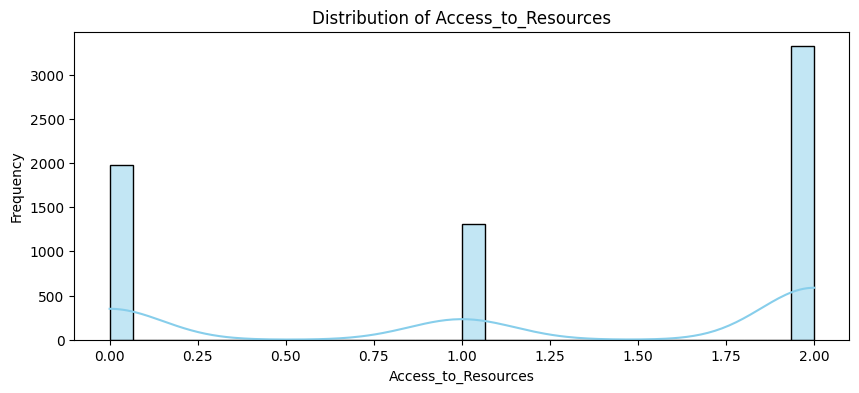

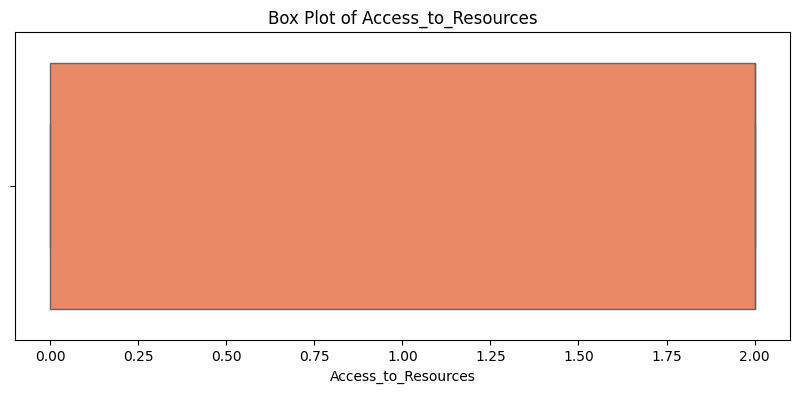

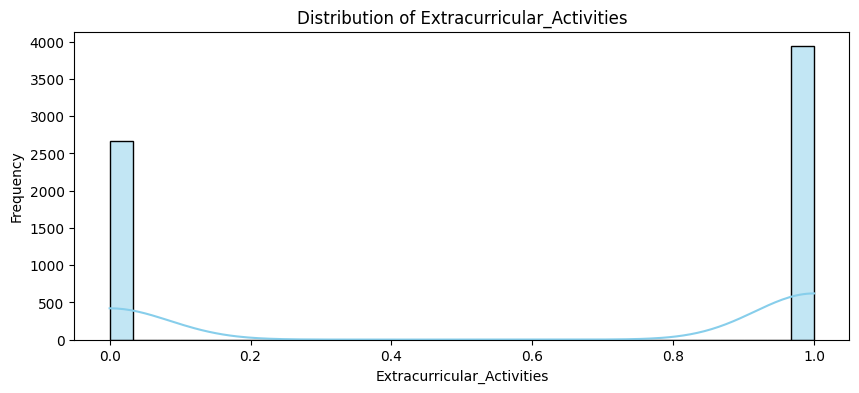

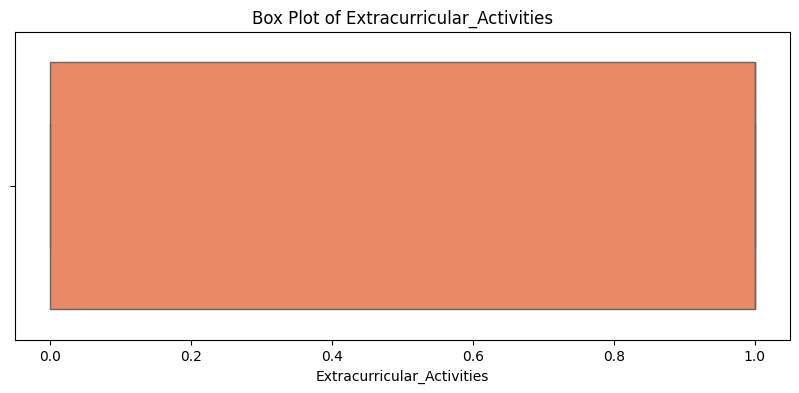

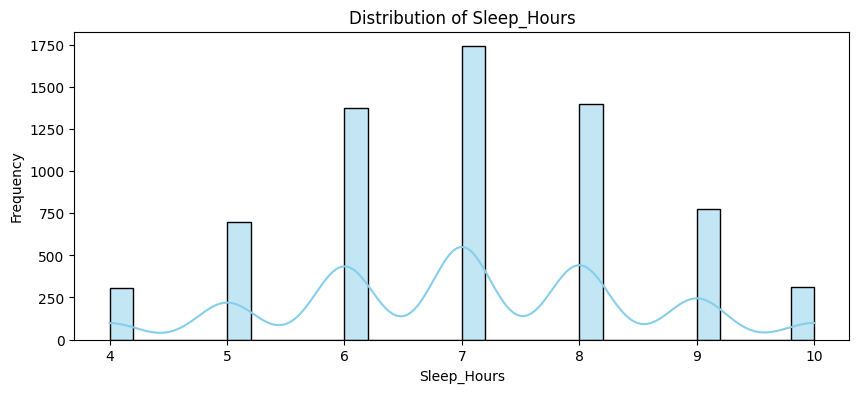

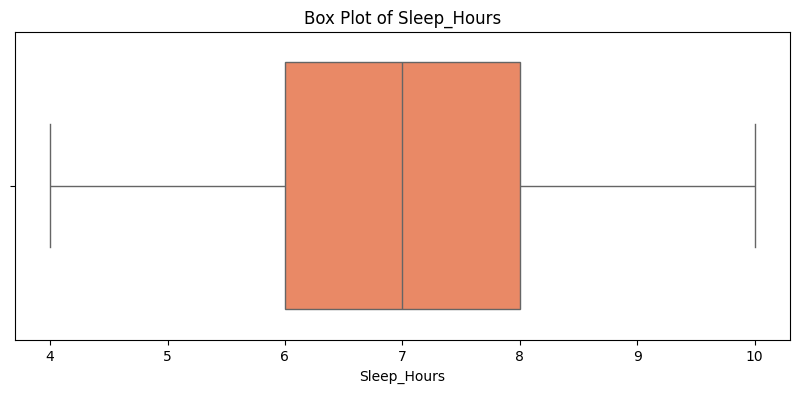

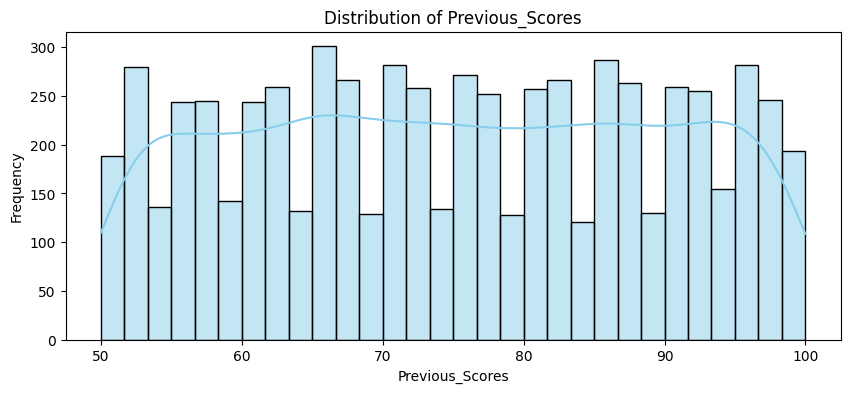

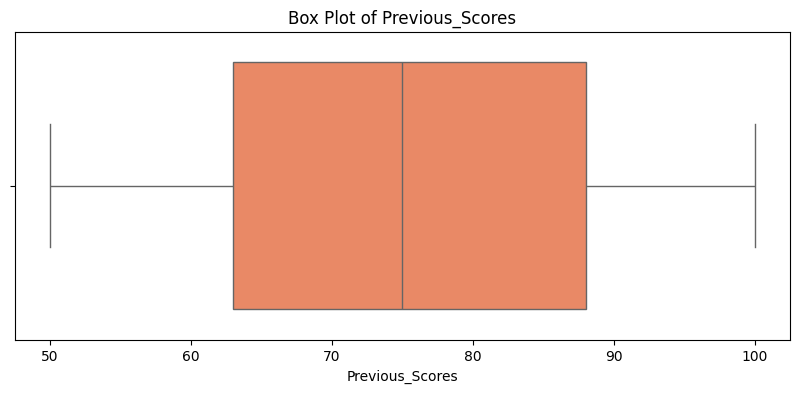

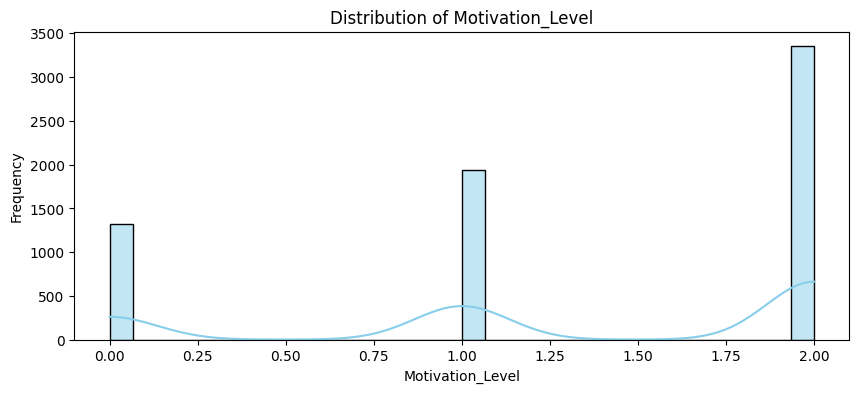

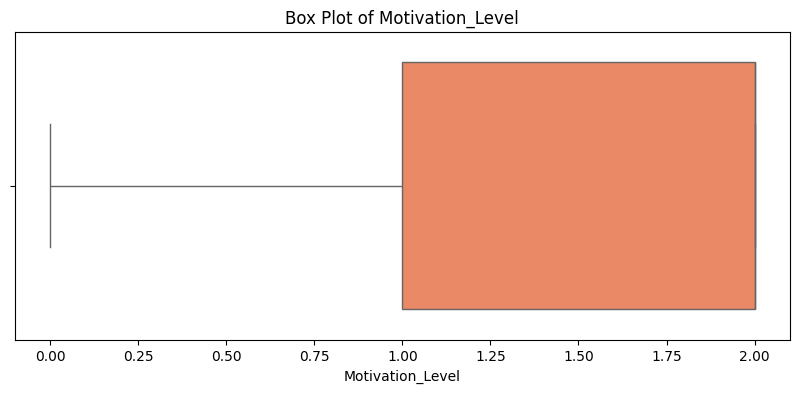

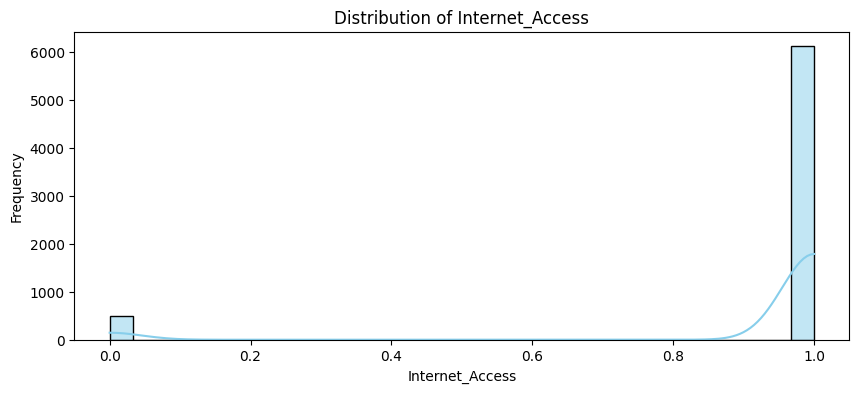

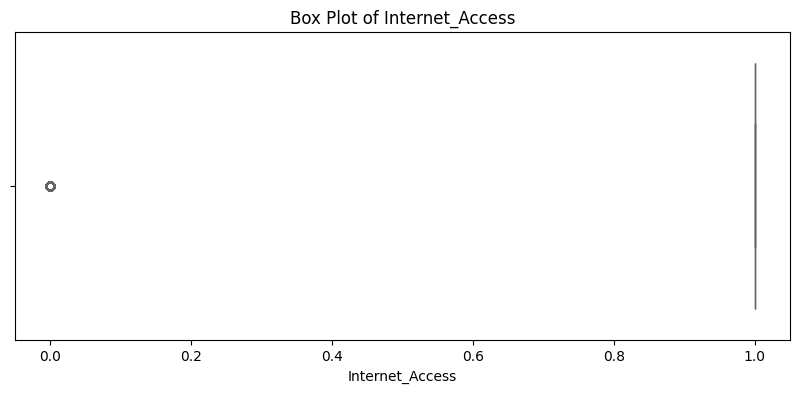

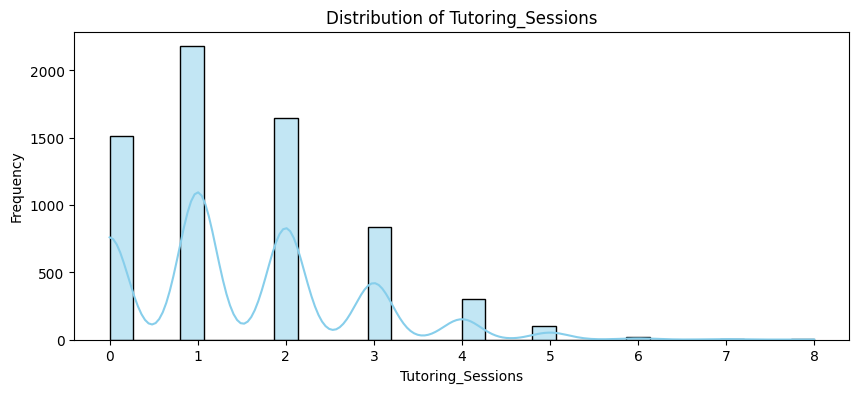

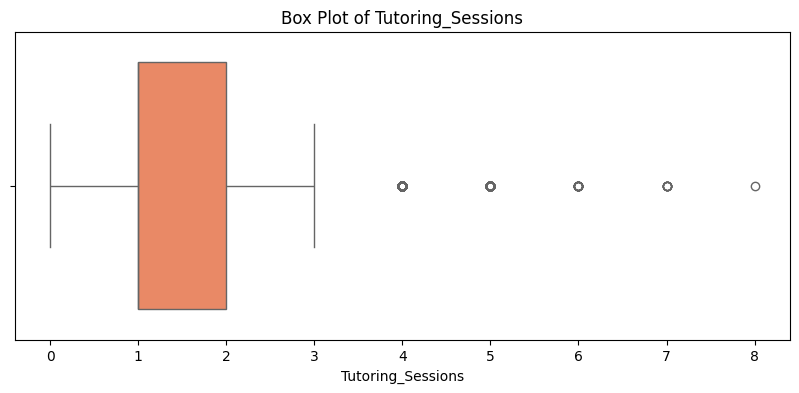

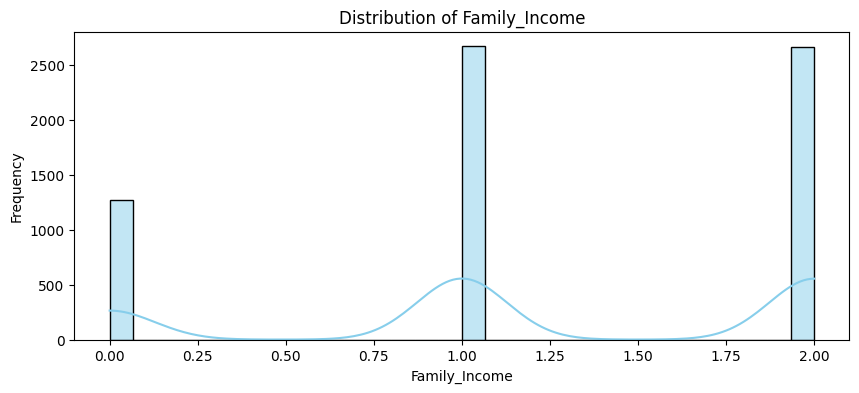

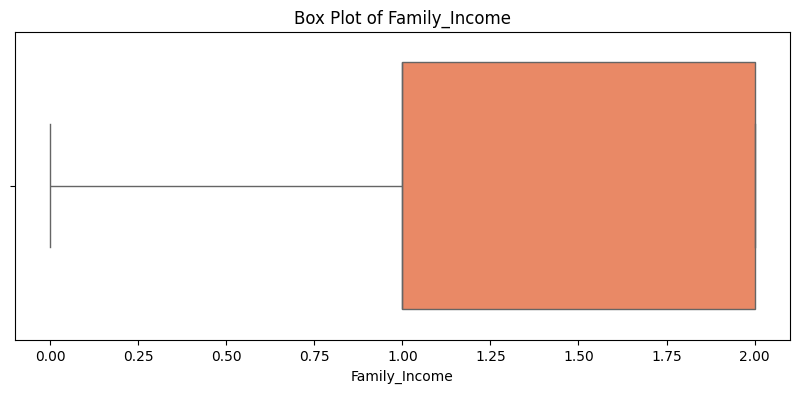

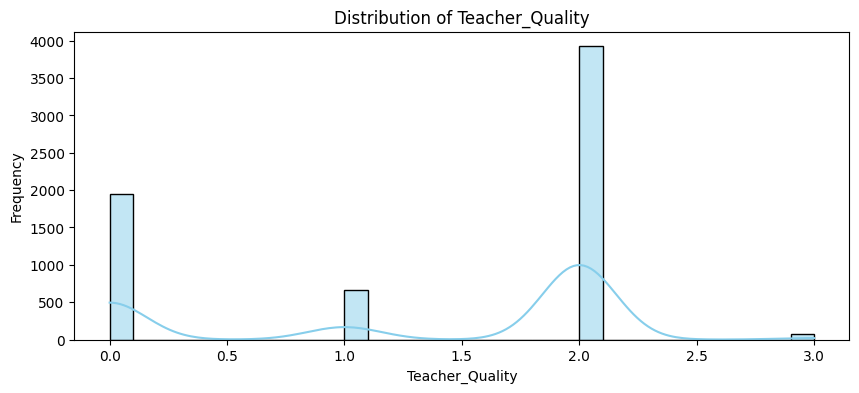

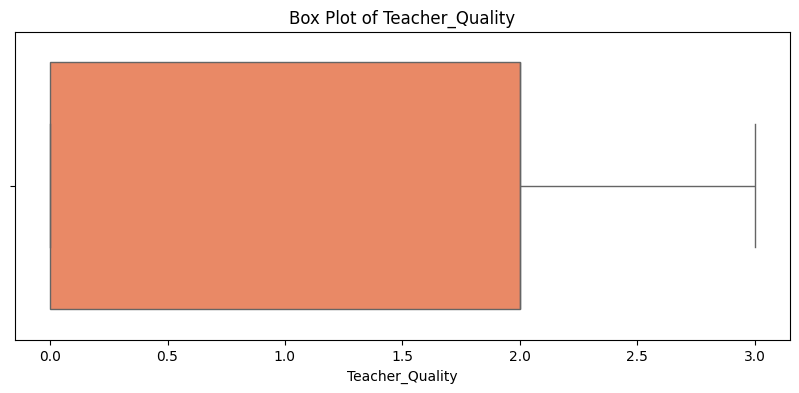

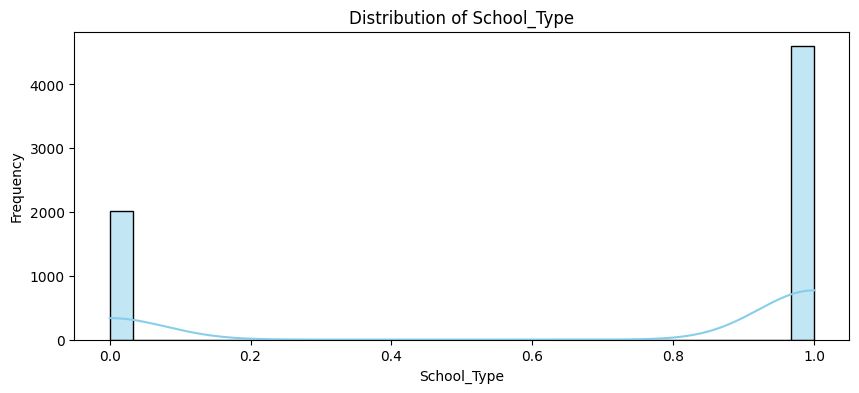

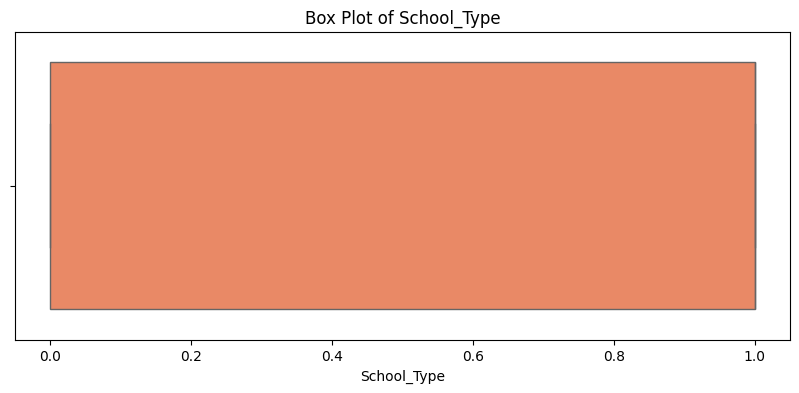

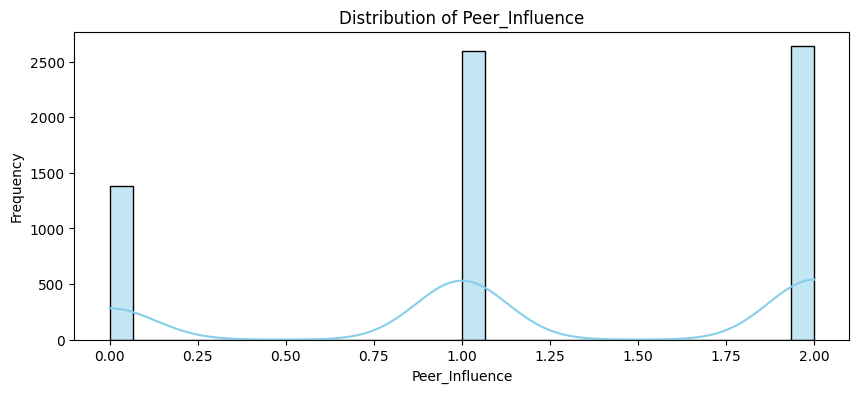

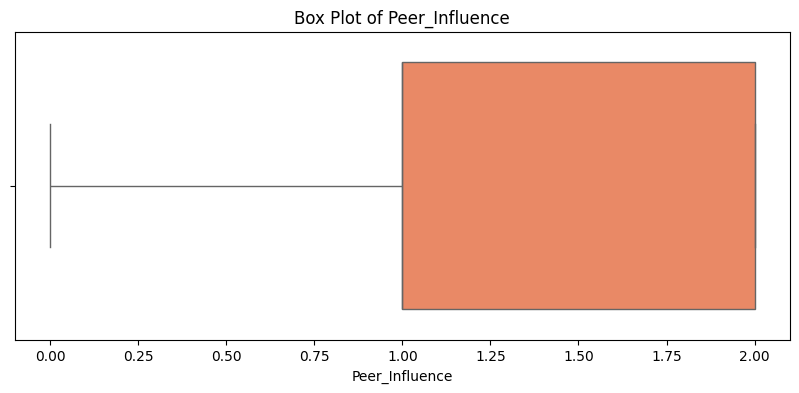

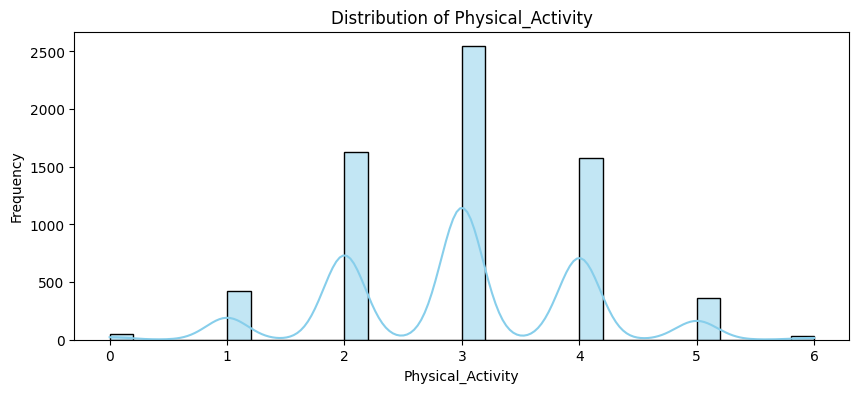

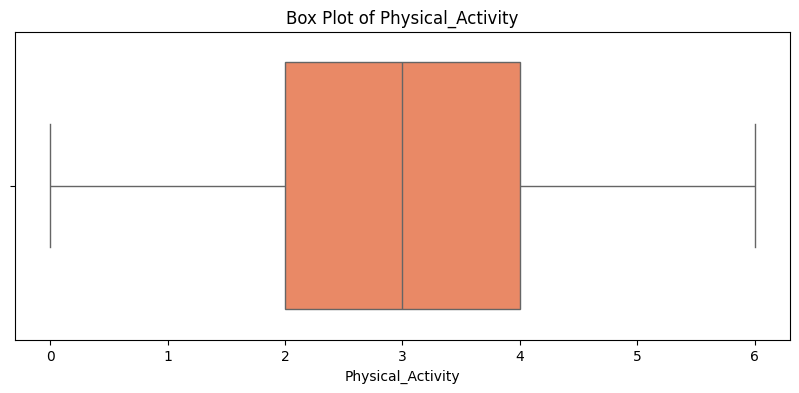

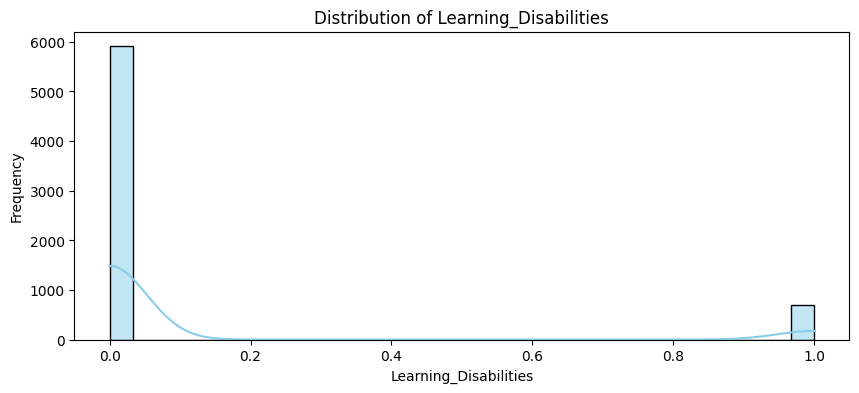

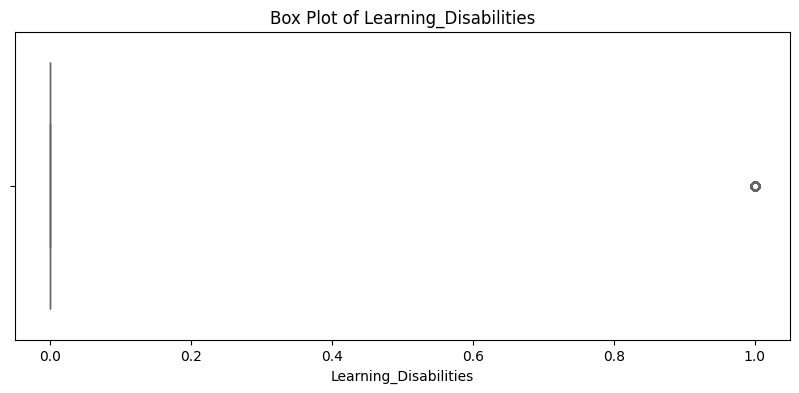

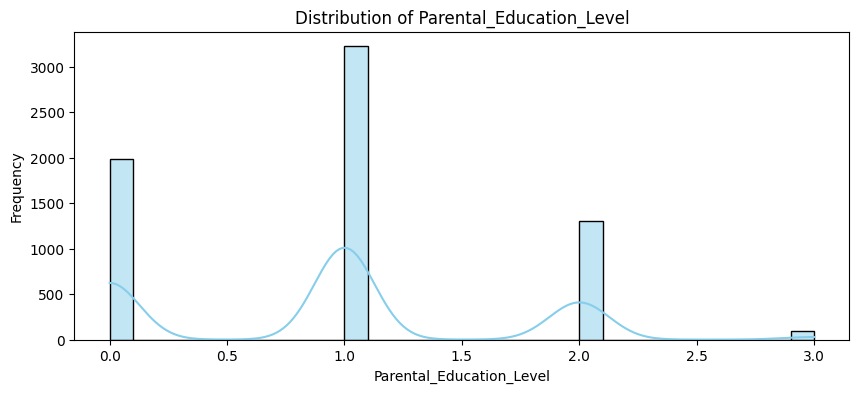

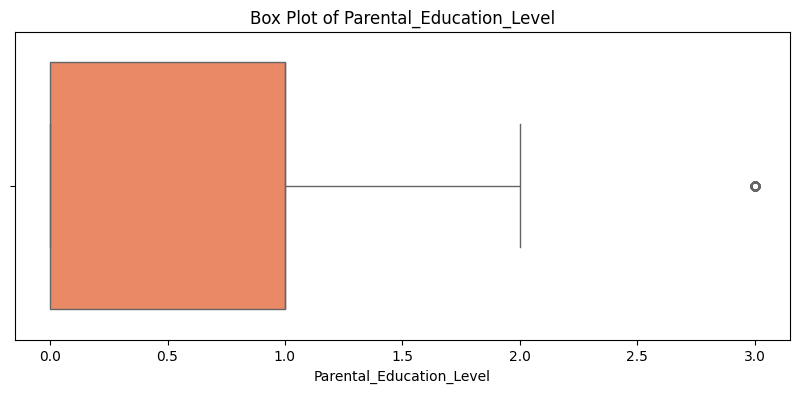

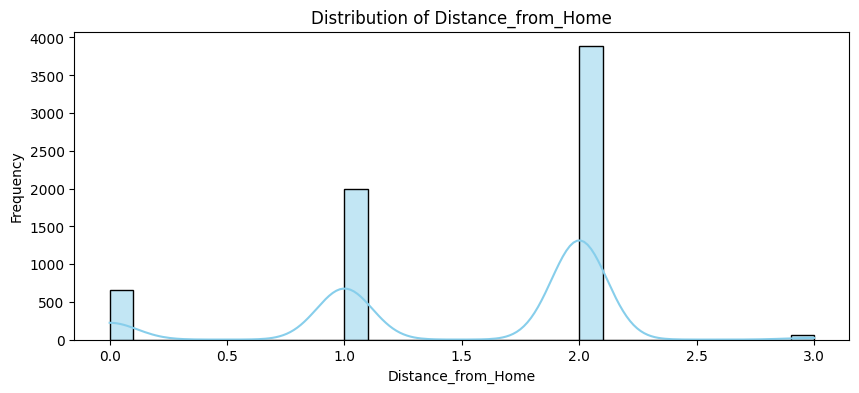

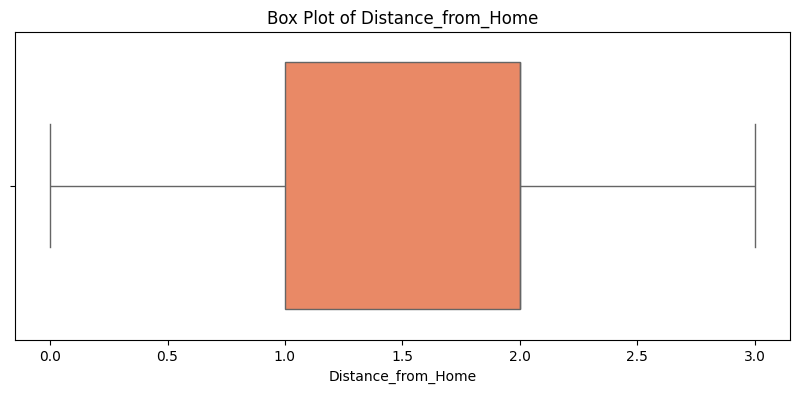

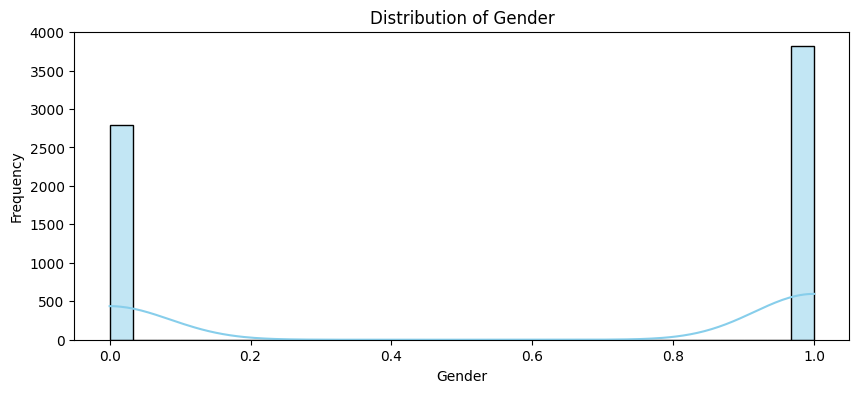

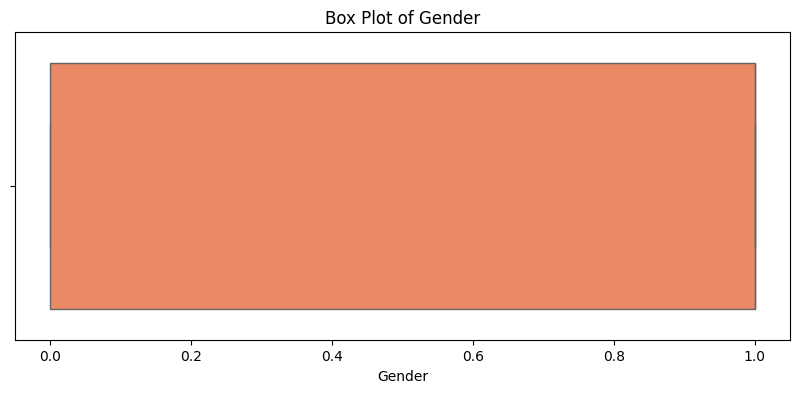

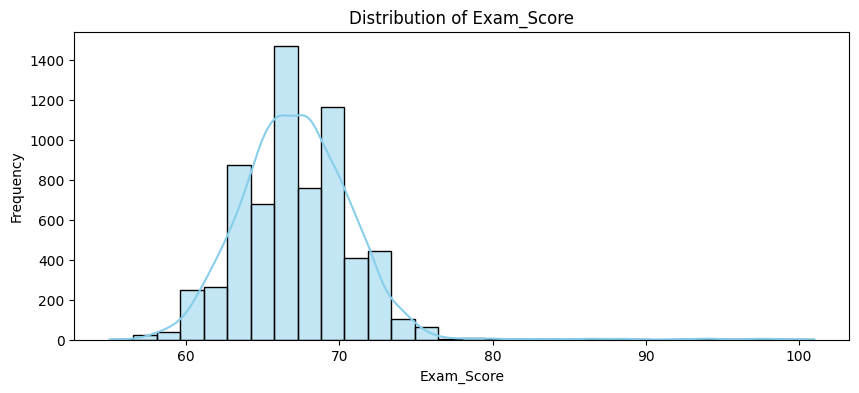

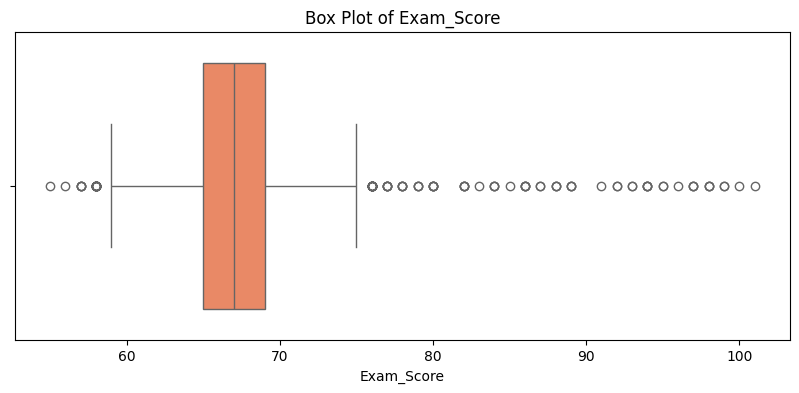

In [59]:
for num_feature in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(numerical_data[num_feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {num_feature}')
    plt.xlabel(num_feature)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.boxplot(x=numerical_data[num_feature], color='coral')
    plt.title(f'Box Plot of {num_feature}')
    plt.show()

# Continuous Feature

3


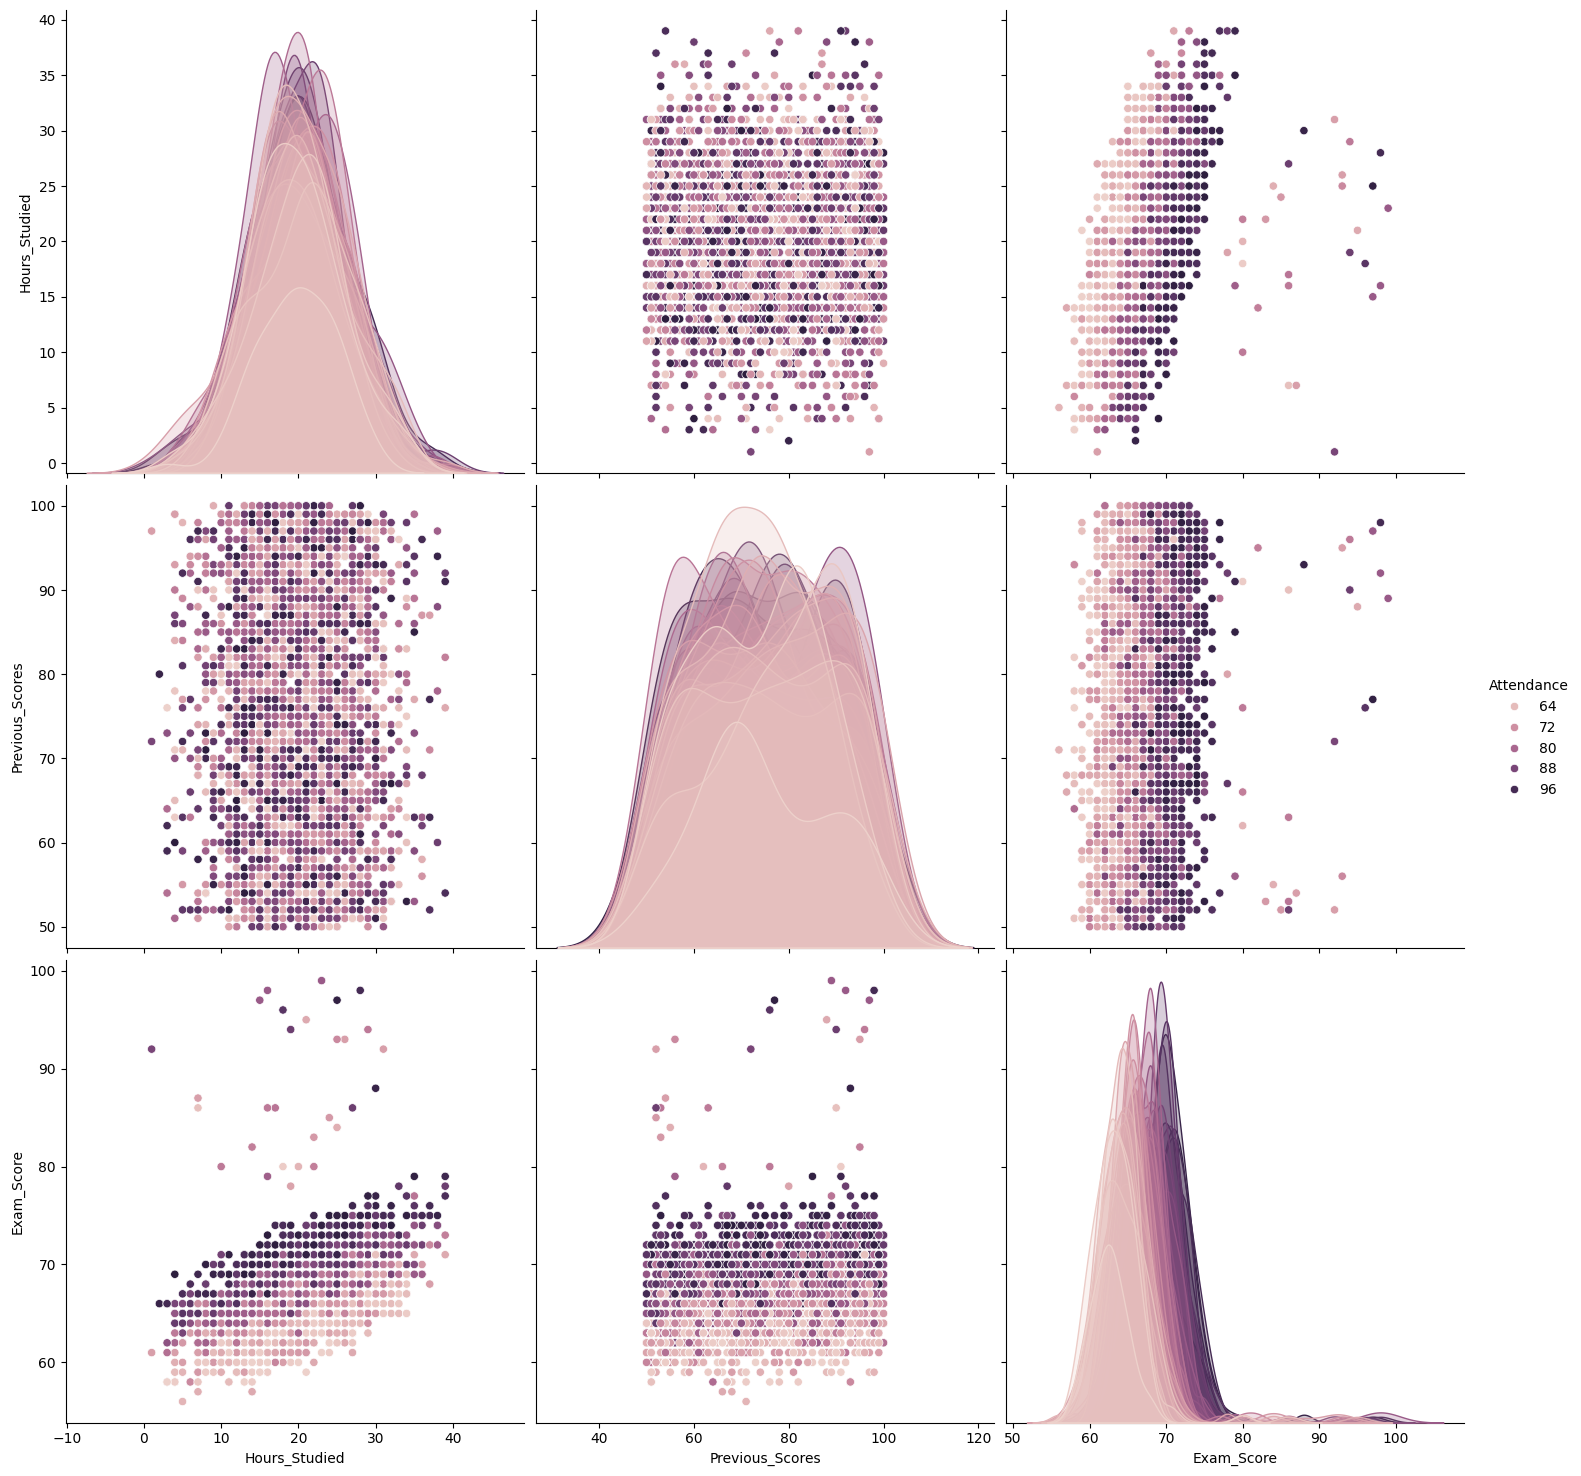

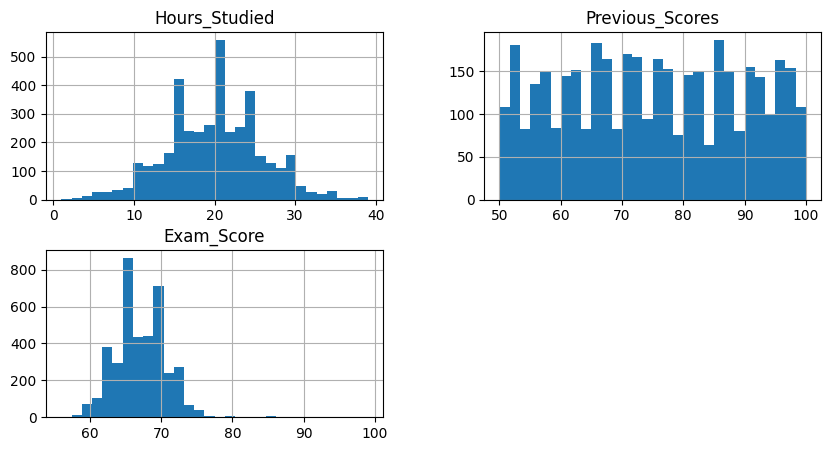

In [61]:

continuous_var = [var for var in numerical_features if var not in discrete_var + ['PassengerId']]
print(len(continuous_var))
X_train[continuous_var].head()


data_with_target = pd.concat([X_train[continuous_var], y_train], axis=1)

sns.pairplot(data_with_target, hue='Attendance', height=5)



X_train[continuous_var].hist(bins=30, figsize=(10, 5));

# Categorical Feature

13
Parental_Involvement          0.000757
Access_to_Resources           0.000757
Motivation_Level              0.000757
Teacher_Quality               0.000757
Family_Income                 0.000757
Distance_from_Home            0.000757
Parental_Education_Level      0.000757
Peer_Influence                0.000757
Extracurricular_Activities    0.000505
Internet_Access               0.000505
School_Type                   0.000505
Learning_Disabilities         0.000505
Gender                        0.000505
dtype: float64


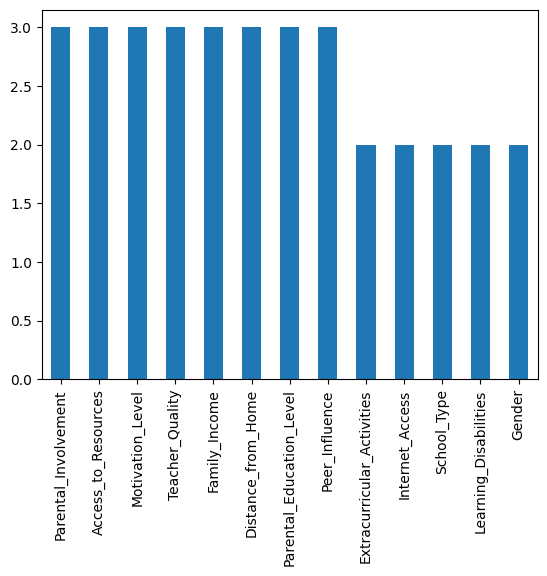

In [62]:
print(len(categorical_features))
X_train[categorical_features].head()

## Number of labels: Cardinality

cardinalith = X_train[categorical_features].nunique().sort_values(ascending=False)
print(cardinalith / X_train.shape[0])
cardinalith.plot.bar();
